# **Loading the required libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

# To ignore any warnings
import warnings 
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Loading the data and creating a dataframe**

In [ ]:
 # Importing dataset in csv format as the data received is in .txt format and then converted to excel.
acc_df = pd.read_csv(r'/content/drive/MyDrive/Project folder/accepted_2007_to_2018Q4.csv',encoding = "ISO-8859-1", low_memory=False)

rej_df = pd.read_csv(r'/content/drive/MyDrive/Project folder/rejected_2007_to_2018Q4.csv',encoding = "ISO-8859-1", low_memory=False)


# **Data Description**

In [ ]:
# Checking the number of observations and number of variables in the dataset
acc_df.shape

(2260701, 151)

In [ ]:
rej_df.shape

(27648741, 9)

In [ ]:
# How many rows pandas will show by default with methods like pd.dataframe.head()
pd.options.display.max_rows

60

In [ ]:
# we want to increase it, because in this case there are a lot of column names
pd.options.display.max_rows = 1000

In [ ]:
# Viewing the top 5 rows of the dataset of accepted
# the .T is transposing the matrix.
acc_df.head().T

,0,1,2,3,4
id,68407277,68355089,68341763,66310712,68476807
member_id,NaN,NaN,NaN,NaN,NaN
loan_amnt,3600,24700,20000,35000,10400
funded_amnt,3600,24700,20000,35000,10400
funded_amnt_inv,3600,24700,20000,35000,10400
term,36 months,36 months,60 months,60 months,60 months
int_rate,13.99,11.99,10.78,14.85,22.45
installment,123.03,820.28,432.66,829.9,289.91
grade,C,C,B,C,F
sub_grade,C4,C1,B4,C5,F1


In [ ]:
# Viewing the last 5 rows of the dataset of accepted
acc_df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
2260696,88985880,NaN,40000.0,40000.0,40000.0,60 months,10.49,859.56,B,B3,Vice President,9 years,MORTGAGE,227000.0,Verified,Oct-2016,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,NaN,907xx,CA,12.75,7.0,Feb-1995,705.0,709.0,1.0,9.0,NaN,5.0,0.0,8633.0,64.9,37.0,f,23252.59,23252.59,...,55970.0,28398.0,12300.0,42670.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260697,88224441,NaN,24000.0,24000.0,24000.0,60 months,14.49,564.56,C,C4,Program Manager,6 years,RENT,110000.0,Not Verified,Oct-2016,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,334xx,FL,18.30,0.0,Jul-1999,660.0,664.0,0.0,67.0,72.0,10.0,1.0,17641.0,68.1,31.0,f,0.00,0.00,...,84664.0,62426.0,20700.0,58764.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,Y,Mar-2019,ACTIVE,Mar-2019,10000.0,44.82,1.0
2260698,88215728,NaN,14000.0,14000.0,14000.0,60 months,14.49,329.33,C,C4,Customer Service Technician,10+ years,MORTGAGE,95000.0,Verified,Oct-2016,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,NaN,770xx,TX,23.36,0.0,Jun-1996,660.0,664.0,1.0,37.0,NaN,8.0,0.0,7662.0,54.0,22.0,w,8456.12,8456.12,...,163804.0,44215.0,9500.0,34169.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260699,Total amount funded in policy code 1: 1465324575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2260700,Total amount funded in policy code 2: 521953170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Viewing the top 5 rows of the dataset of rejected.
rej_df.head()

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0.0
1,1000.0,2007-05-26,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0.0
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10%,212xx,MD,1 year,0.0
3,6000.0,2007-05-27,waksman,698.0,38.64%,017xx,MA,< 1 year,0.0
4,1500.0,2007-05-27,mdrigo,509.0,9.43%,209xx,MD,< 1 year,0.0


In [ ]:
# Viewing the last 5 rows of the dataset of rejected
rej_df.tail()

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
27648736,10000.0,2016-12-31,Debt consolidation,590.0,41.26%,441xx,OH,< 1 year,0.0
27648737,10000.0,2016-12-31,moving,NaN,1.48%,207xx,MD,5 years,0.0
27648738,1200.0,2016-12-31,Other,686.0,10.26%,914xx,CA,< 1 year,0.0
27648739,25000.0,2016-12-31,debt_consolidation,NaN,17.71%,880xx,NM,< 1 year,0.0
27648740,15000.0,2016-12-31,Business,684.0,10.58%,113xx,NY,< 1 year,0.0


In [ ]:
# Checking the data types of variables
# It will also help us to find the number of non-null (not missing) data points for each column
# because this dataframe is so large, we have to force it to show the datatypes and non-null numbers with the arguments
acc_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 151 columns):
 #   Column                                      Non-Null Count    Dtype  
---  ------                                      --------------    -----  
 0   id                                          2260701 non-null  object 
 1   member_id                                   0 non-null        float64
 2   loan_amnt                                   2260668 non-null  float64
 3   funded_amnt                                 2260668 non-null  float64
 4   funded_amnt_inv                             2260668 non-null  float64
 5   term                                        2260668 non-null  object 
 6   int_rate                                    2260668 non-null  float64
 7   installment                                 2260668 non-null  float64
 8   grade                                       2260668 non-null  object 
 9   sub_grade                                   2260668 non-

In [ ]:
rej_df.info

<bound method DataFrame.info of           Amount Requested Application Date  ... Employment Length  Policy Code
0                   1000.0       2007-05-26  ...           4 years          0.0
1                   1000.0       2007-05-26  ...          < 1 year          0.0
2                  11000.0       2007-05-27  ...            1 year          0.0
3                   6000.0       2007-05-27  ...          < 1 year          0.0
4                   1500.0       2007-05-27  ...          < 1 year          0.0
...                    ...              ...  ...               ...          ...
27648736           10000.0       2016-12-31  ...          < 1 year          0.0
27648737           10000.0       2016-12-31  ...           5 years          0.0
27648738            1200.0       2016-12-31  ...          < 1 year          0.0
27648739           25000.0       2016-12-31  ...          < 1 year          0.0
27648740           15000.0       2016-12-31  ...          < 1 year          0.0

[276487

In [ ]:
#Summary statistics
# Which will also help us to find the outliers
acc_df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,...,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260639e+06,2.260668e+06,2.260668e+06,2.260638e+06,1.102166e+06,359156.000000,2.260639e+06,2.260639e+06,2.260668e+06,2.258866e+06,2.260639e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260523e+06,580775.000000,2260668.0,1.207100e+05,120706.000000,2.260639e+06,2.190392e+06,2.190392e+06,1.394538e+06,...,2.190392e+06,2.190392e+06,2.190392e+06,2.190391e+06,2.190392e+06,2.202078e+06,2.107011e+06,2.190392e+06,2.190392e+06,2.190392e+06,2.190237e+06,2.185289e+06,2.259303e+06,2.260563e+06,2.190392e+06,2.210638e+06,2.210638e+06,2.190392e+06,1.080200e+05,108021.000000,108021.000000,108021.000000,108021.000000,108021.000000,106184.000000,108021.000000,108021.000000,108021.000000,108021.000000,35942.000000,10917.0,10917.000000,10917.0,10917.000000,8651.000000,10917.000000,10917.000000,34246.000000,34246.000000,34246.000000
mean,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309283e+01,4.458068e+02,7.799243e+04,1.882420e+01,3.068792e-01,6.985882e+02,7.025884e+02,5.768354e-01,3.454092e+01,72.312842,1.161240e+01,1.975278e-01,1.665846e+04,5.033770e+01,2.416255e+01,4.206891e+03,4.205965e+03,1.208256e+04,1.206439e+04,9.505772e+03,2.431388e+03,1.518453e+00,1.438791e+02,2.398257e+01,3.429346e+03,6.876610e+02,6.755397e+02,1.814580e-02,44.164220,1.0,1.236246e+05,19.251817,4.147942e-03,2.327317e+02,1.424922e+05,9.344199e-01,...,7.726402e+00,8.413439e+00,8.246523e+00,1.400463e+01,5.577951e+00,1.162813e+01,6.373958e-04,2.813652e-03,8.293767e-02,2.076755e+00,9.411458e+01,4.243513e+01,1.281935e-01,4.677109e-02,1.782428e+05,5.102294e+04,2.319377e+04,4.373201e+04,3.361728e+04,669.755603,673.755631,0.633256,1.538997,11.469455,58.169101,3.010554,12.533072,0.046352,0.077568,36.937928,3.0,155.045981,3.0,13.743886,454.798089,11636.883942,193.994321,5010.664267,47.780365,13.191322
std,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832138e+00,2.671735e+02,1.126962e+05,1.418333e+01,8.672303e-01,3.301038e+01,3.301124e+01,8.859632e-01,2.190047e+01,26.464094,5.640861e+00,5.705150e-01,2.294831e+04,2.471307e+01,1.198753e+01,7.343239e+03,7.342333e+03,9.901383e+03,9.896992e+03,8.321852e+03,2.679738e+03,1.184159e+01,7.481640e+02,1.312256e+02,6.018248e+03,7.297044e+01,1.110976e+02,1.508131e-01,21.533121,0.0,7.416135e+04,7.822086,6.961656e-02,8.518462e+03,1.606926e+05,1.140700e+00,...,4.701430e+00,7.359114e+00,4.683928e+00,8.038868e+00,3.293434e+00,5.644027e+00,2.710643e-02,5.616522e-02,4.935732e-01,1.830711e+00,9.036140e+0

In [ ]:
rej_df.describe()

,Amount Requested,Risk_Score,Policy Code
count,2.764874e+07,9.151111e+06,2.764782e+07
mean,1.313324e+04,6.281721e+02,6.375113e-03
std,1.500964e+04,8.993679e+01,1.127368e-01
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.800000e+03,5.910000e+02,0.000000e+00
50%,1.000000e+04,6.370000e+02,0.000000e+00
75%,2.000000e+04,6.750000e+02,0.000000e+00
max,1.400000e+06,9.900000e+02,2.000000e+00


### Handling Null Values

In [ ]:
# Replacing the missing values in the data which is present as an underline.
acc_df=acc_df.replace('_', np.nan)

In [ ]:
# checking the null values % in accepted dataframe
round(((acc_df.isnull().sum())/len(acc_df))*100,2).sort_values(ascending=False)

member_id                                     100.00
orig_projected_additional_accrued_interest     99.62
hardship_loan_status                           99.52
hardship_dpd                                   99.52
hardship_reason                                99.52
hardship_status                                99.52
deferral_term                                  99.52
hardship_amount                                99.52
hardship_start_date                            99.52
hardship_end_date                              99.52
payment_plan_start_date                        99.52
hardship_length                                99.52
hardship_type                                  99.52
hardship_payoff_balance_amount                 99.52
hardship_last_payment_amount                   99.52
settlement_percentage                          98.49
debt_settlement_flag_date                      98.49
settlement_status                              98.49
settlement_date                               

In [ ]:
# checking null value % in rejected dataframe
((rej_df.isnull().sum())/len(rej_df))*100

Amount Requested         0.000000
Application Date         0.000000
Loan Title               0.004713
Risk_Score              66.902251
Debt-To-Income Ratio     0.000000
Zip Code                 0.001060
State                    0.000080
Employment Length        3.440862
Policy Code              0.003320
dtype: float64

In [ ]:
# Feature Selecting which variable to drop according to domain knowledge and missing variables
acc_df=acc_df.drop(['member_id' ,	'sub_grade',	'url' ,'title',	'zip_code' ,'desc','last_pymnt_d',
                        	'open_acc' ,'mths_since_last_delinq', 'out_prncp_inv',	'total_pymnt'	,'next_pymnt_d',	'annual_inc_joint','mths_since_last_record',
                         'collections_12_mths_ex_med', 'mths_since_last_major_derog',	'policy_code', 	'open_acc_6m','open_il_12m','pub_rec_bankruptcies',
                        		'sec_app_fico_range_low',	 'sec_app_fico_range_high',	'sec_app_earliest_cr_line','il_util','mths_since_recent_bc_dlq',
                         'dti_joint','sec_app_inq_last_6mths',	'sec_app_open_acc',	'sec_app_revol_util',
                        	'sec_app_open_act_il',	'sec_app_num_rev_accts','sec_app_chargeoff_within_12_mths',	'sec_app_collections_12_mths_ex_med',
                        	'sec_app_mths_since_last_major_derog','hardship_type'	,'hardship_reason',	'hardship_status','deferral_term','hardship_amount',
                        'hardship_start_date','hardship_end_date','payment_plan_start_date','revol_bal_joint','sec_app_mort_acc','mths_since_recent_revol_delinq',  
                        'hardship_length',	'hardship_dpd',	'hardship_loan_status','orig_projected_additional_accrued_interest','hardship_payoff_balance_amount',
                        'hardship_last_payment_amount',	'debt_settlement_flag_date','settlement_status' ,	'settlement_date',	
                        'settlement_amount','settlement_percentage','settlement_term'], axis=1)
acc_df.shape

(2260701, 94)

member_id : It is dropped cause a huge data is missing and we cannot fill it with mean cause it is unique id of each individual.

zip_code:This variable is in num and the last few digits are missing so it does not make sense to keep it.

addr_state:This variable wont matter cause the dependent variable wont depend on the state and so keeping it might lead the data miscalculated.

desc:- A huge amount of data is missing here and it does not make sense to fill it.

collections_12_mths_ex_med:Medical collection makes not much relation to the dep var.

emp_title: In emp_title it is the job position of the borrower, most importantly it would  not add any significant information in predicting the result,so dropped it.

mths_since_last_record:Not significant for the prediction.

inq_last_6mths: Not significant for the prediction.It is just the inquery which 
has no specific output to what it means.

next_payment_d: Not significant for model.

last_pymnt_d: The payment recieved at the end wont matter much and hence not significant.

sub_grade: As grade is already present in the data this is just a repetation.

term: This is basically number of payments which is mostly realted to the time series.

Most of the variables other than the ones mentioned above has a missing data of more than 90% which does not makes sense to keep as it will lead the prediction to misleading clculations and some of them are dropped because of repitation. 



In [ ]:
rej_df = rej_df.drop(['Risk_Score','Zip Code','State','Policy Code'], axis=1) 
rej_df.shape   

(27648741, 5)

In [ ]:
acc_df.shape

(2260701, 94)

Removed Risk score cause major of the values were missing.

Zip Code:- It has no relevance in the future predictions.

State:- Again it is just short forms and we do not know the actual state 
so keeping it might lead the data miscalculated.

Same with Policy code it does not having any significanace in the modelling.

In [ ]:
# Separating the Numerical/Date-Time variables and the Categorical variables for accepted dataset.
num_vars = acc_df.columns[acc_df.dtypes != 'object']
cat_vars = acc_df.columns[acc_df.dtypes == 'object']

print(num_vars)
print()
print(cat_vars)

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low',
       'fico_range_high', 'inq_last_6mths', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'last_fico_range_high',
       'last_fico_range_low', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'open_act_il', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_

In [ ]:
# checking the missing values of numerical vars.
acc_df[num_vars].isnull().sum()

loan_amnt                         33
funded_amnt                       33
funded_amnt_inv                   33
int_rate                          33
installment                       33
annual_inc                        37
dti                             1744
delinq_2yrs                       62
fico_range_low                    33
fico_range_high                   33
inq_last_6mths                    63
pub_rec                           62
revol_bal                         33
revol_util                      1835
total_acc                         62
out_prncp                         33
total_pymnt_inv                   33
total_rec_prncp                   33
total_rec_int                     33
total_rec_late_fee                33
recoveries                        33
collection_recovery_fee           33
last_pymnt_amnt                   33
last_fico_range_high              33
last_fico_range_low               33
acc_now_delinq                    62
tot_coll_amt                   70309
t

In [ ]:
# Replacing the missing values with mean for numerical variables for accepted data.
for value in ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate','installment', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low',
              'fico_range_high', 'inq_last_6mths', 'pub_rec', 'revol_bal','revol_util', 'total_acc', 'out_prncp', 'total_pymnt_inv',
              'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries','collection_recovery_fee', 'last_pymnt_amnt', 'last_fico_range_high',
             'last_fico_range_low', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal','open_act_il', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
              'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util','total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
                'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util','chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
                 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl','mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq',
            'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl','num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl','num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
         'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m','pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tax_liens', 'tot_hi_cred_lim',
               'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit']:
    acc_df[value].fillna(round(acc_df[value].mean(),0),inplace=True)

In [ ]:
acc_df[num_vars].isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
int_rate                      0
installment                   0
annual_inc                    0
dti                           0
delinq_2yrs                   0
fico_range_low                0
fico_range_high               0
inq_last_6mths                0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
out_prncp                     0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pymnt_amnt               0
last_fico_range_high          0
last_fico_range_low           0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_bal                   0
open_act_il                   0
open_il_24m                   0
mths_since_rcnt_il            0
total_ba

In [ ]:
# Replacing the missing values with mode for categorical variables for accepted data.
for value in ['grade','term', 'emp_length', 'home_ownership', 'verification_status','pymnt_plan',
       'issue_d', 'loan_status', 'purpose', 'initial_list_status','earliest_cr_line',
       'last_credit_pull_d','application_type', 'hardship_flag', 'disbursement_method',
       'debt_settlement_flag','verification_status_joint',]:
   acc_df[value].fillna(acc_df[value].mode()[0],inplace=True)

In [ ]:
acc_df[cat_vars].isnull().sum()

id                                0
term                              0
grade                             0
emp_title                    167002
emp_length                        0
home_ownership                    0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
purpose                           0
addr_state                       33
earliest_cr_line                  0
initial_list_status               0
last_credit_pull_d                0
application_type                  0
verification_status_joint         0
hardship_flag                     0
disbursement_method               0
debt_settlement_flag              0
dtype: int64

In [ ]:
# rechecking the null values in accepted dataframe
acc_df.isnull().sum()

id                                 0
loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
int_rate                           0
installment                        0
grade                              0
emp_title                     167002
emp_length                         0
home_ownership                     0
annual_inc                         0
verification_status                0
issue_d                            0
loan_status                        0
pymnt_plan                         0
purpose                            0
addr_state                        33
dti                                0
delinq_2yrs                        0
earliest_cr_line                   0
fico_range_low                     0
fico_range_high                    0
inq_last_6mths                     0
pub_rec                            0
revol_bal                          0
revol_util                         0
t

 ***All null values are handled successfully in  accepted dataframe***

In [ ]:
# Replacing the missing values with mean for categorical variables for rejected data.
for value in ['Loan Title','Employment Length']:
    rej_df[value].fillna(rej_df[value].mode()[0],inplace=True)

In [ ]:
rej_df.isnull().sum()

Amount Requested        0
Application Date        0
Loan Title              0
Debt-To-Income Ratio    0
Employment Length       0
dtype: int64

***All null values are handled successfully in rejected dataframe***

# Handling Skewness in dataframe

**Skewness in categorical column in accepted dataframe**

In [ ]:
# checking for unique value count
acc_df.nunique().sort_values().head(15)

debt_settlement_flag         2
hardship_flag                2
application_type             2
term                         2
pymnt_plan                   2
disbursement_method          2
initial_list_status          2
verification_status_joint    3
verification_status          3
num_tl_30dpd                 5
home_ownership               6
grade                        7
num_tl_120dpd_2m             7
acc_now_delinq               9
loan_status                  9
dtype: int64

In [ ]:
#skewness % in categorical column for less than 3 unique values 
print(acc_df.debt_settlement_flag.value_counts(normalize=True))
print('\n',acc_df.hardship_flag.value_counts(normalize=True))
print('\n',acc_df.application_type.value_counts(normalize=True))
print('\n',acc_df.initial_list_status.value_counts(normalize=True))
print('\n',acc_df.term.value_counts(normalize=True))
print('\n',acc_df.pymnt_plan.value_counts(normalize=True))
print('\n',acc_df.disbursement_method.value_counts(normalize=True))
print('\n',acc_df.verification_status_joint.value_counts(normalize=True))
print('\n',acc_df.verification_status.value_counts(normalize=True))


N    0.984852
Y    0.015148
Name: debt_settlement_flag, dtype: float64

 N    0.999632
Y    0.000368
Name: hardship_flag, dtype: float64

 Individual    0.946605
Joint App     0.053395
Name: application_type, dtype: float64

 w    0.679214
f    0.320786
Name: initial_list_status, dtype: float64

  36 months    0.712074
 60 months    0.287926
Name: term, dtype: float64

 n    0.999726
y    0.000274
Name: pymnt_plan, dtype: float64

 Cash         0.965443
DirectPay    0.034557
Name: disbursement_method, dtype: float64

 Not Verified       0.974200
Source Verified    0.015405
Verified           0.010395
Name: verification_status_joint, dtype: float64

 Source Verified    0.392031
Not Verified       0.329458
Verified           0.278511
Name: verification_status, dtype: float64


**except column initial_list_status ,term and verification_status all above mentioned columns are highly skewed so lets drop these columns**

In [ ]:
#dropping columns 
acc_df.drop(['debt_settlement_flag','hardship_flag','application_type','pymnt_plan','disbursement_method','verification_status_joint'],axis=1,inplace=True)

In [ ]:
acc_df.shape

(2260701, 88)

## Handling Outliers

In [ ]:
# checking for outlier tendency
acc_df.kurtosis(axis=0).sort_values(ascending=False)

tot_coll_amt                  829565.196516
annual_inc                    439008.843978
delinq_amnt                    16006.442765
total_rev_hi_lim                7762.435211
num_tl_120dpd_2m                5945.962718
tax_liens                       3476.533587
max_bal_bc                      2835.917487
dti                             1756.617184
acc_now_delinq                  1256.736485
total_rec_late_fee               957.560884
pub_rec                          704.131087
revol_bal                        643.207488
num_tl_30dpd                     642.550586
chargeoff_within_12_mths         598.179643
num_tl_90g_dpd_24m               473.518297
collection_recovery_fee          224.487131
recoveries                       196.806351
tot_hi_cred_lim                   87.134070
delinq_2yrs                       73.353890
total_bal_ex_mort                 67.137076
total_bal_il                      54.936505
num_accts_ever_120_pd             53.433317
mo_sin_rcnt_tl                  

In [ ]:
# Separating the Numerical column from accepted dataset.
num_vars = list(acc_df.columns[acc_df.dtypes == 'float64'])
print(len(num_vars))

74


In [ ]:
#acc_df.info()

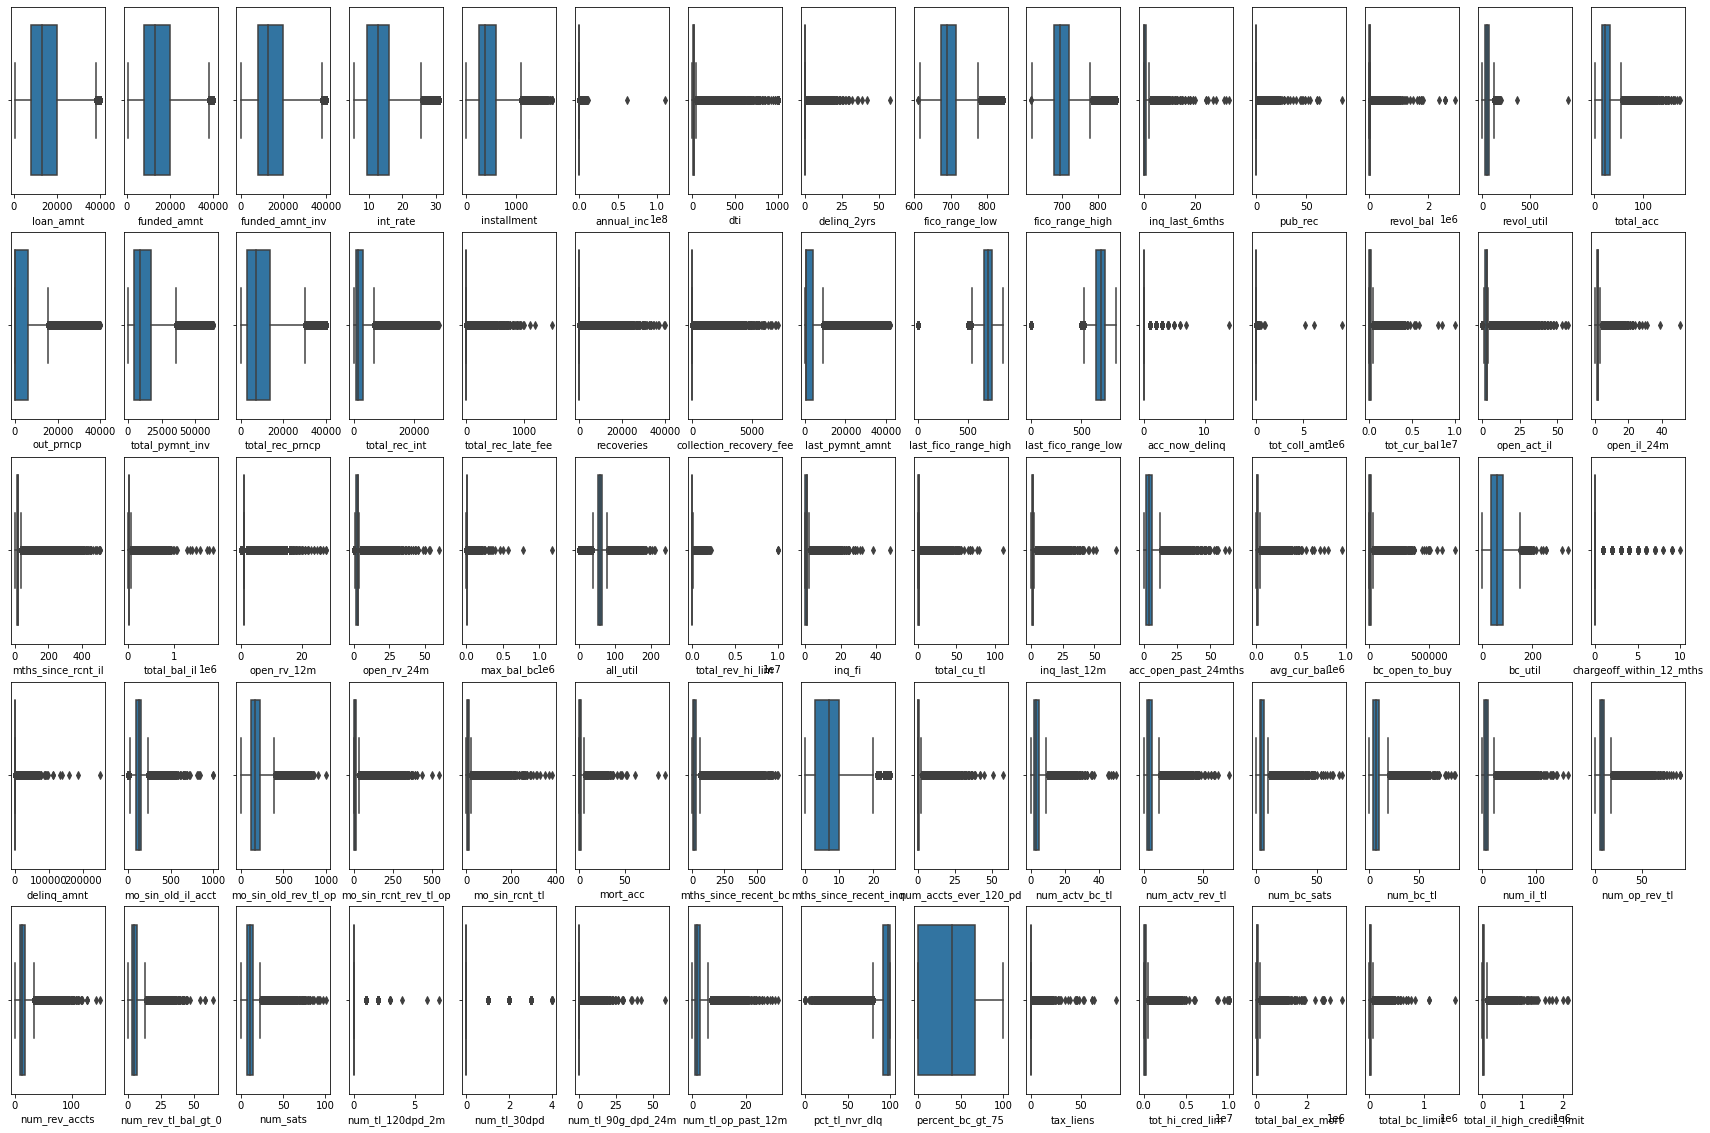

In [ ]:
# plotting boxplot
plt.figure(figsize=(30, 20))
i, j = 5, 15
for k in range(1, 75):
    plt.subplot(i, j, k)
    sns.boxplot(acc_df[num_vars[k - 1]])

In [ ]:
# capping the some outlier on 1 percentile and 99 percentile
outlier_cols_99_perc=['delinq_2yrs','pub_rec','acc_now_delinq','tot_coll_amt','open_rv_12m','chargeoff_within_12_mths','delinq_amnt',
                      'num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m','tax_liens','dti','revol_util','bc_util','percent_bc_gt_75']

for cols in acc_df.columns:
    percentiles = acc_df[outlier_cols_99_perc].quantile([0.01, 0.99]).values
    acc_df[outlier_cols_99_perc] = np.clip(acc_df[outlier_cols_99_perc], percentiles[0],percentiles[1])

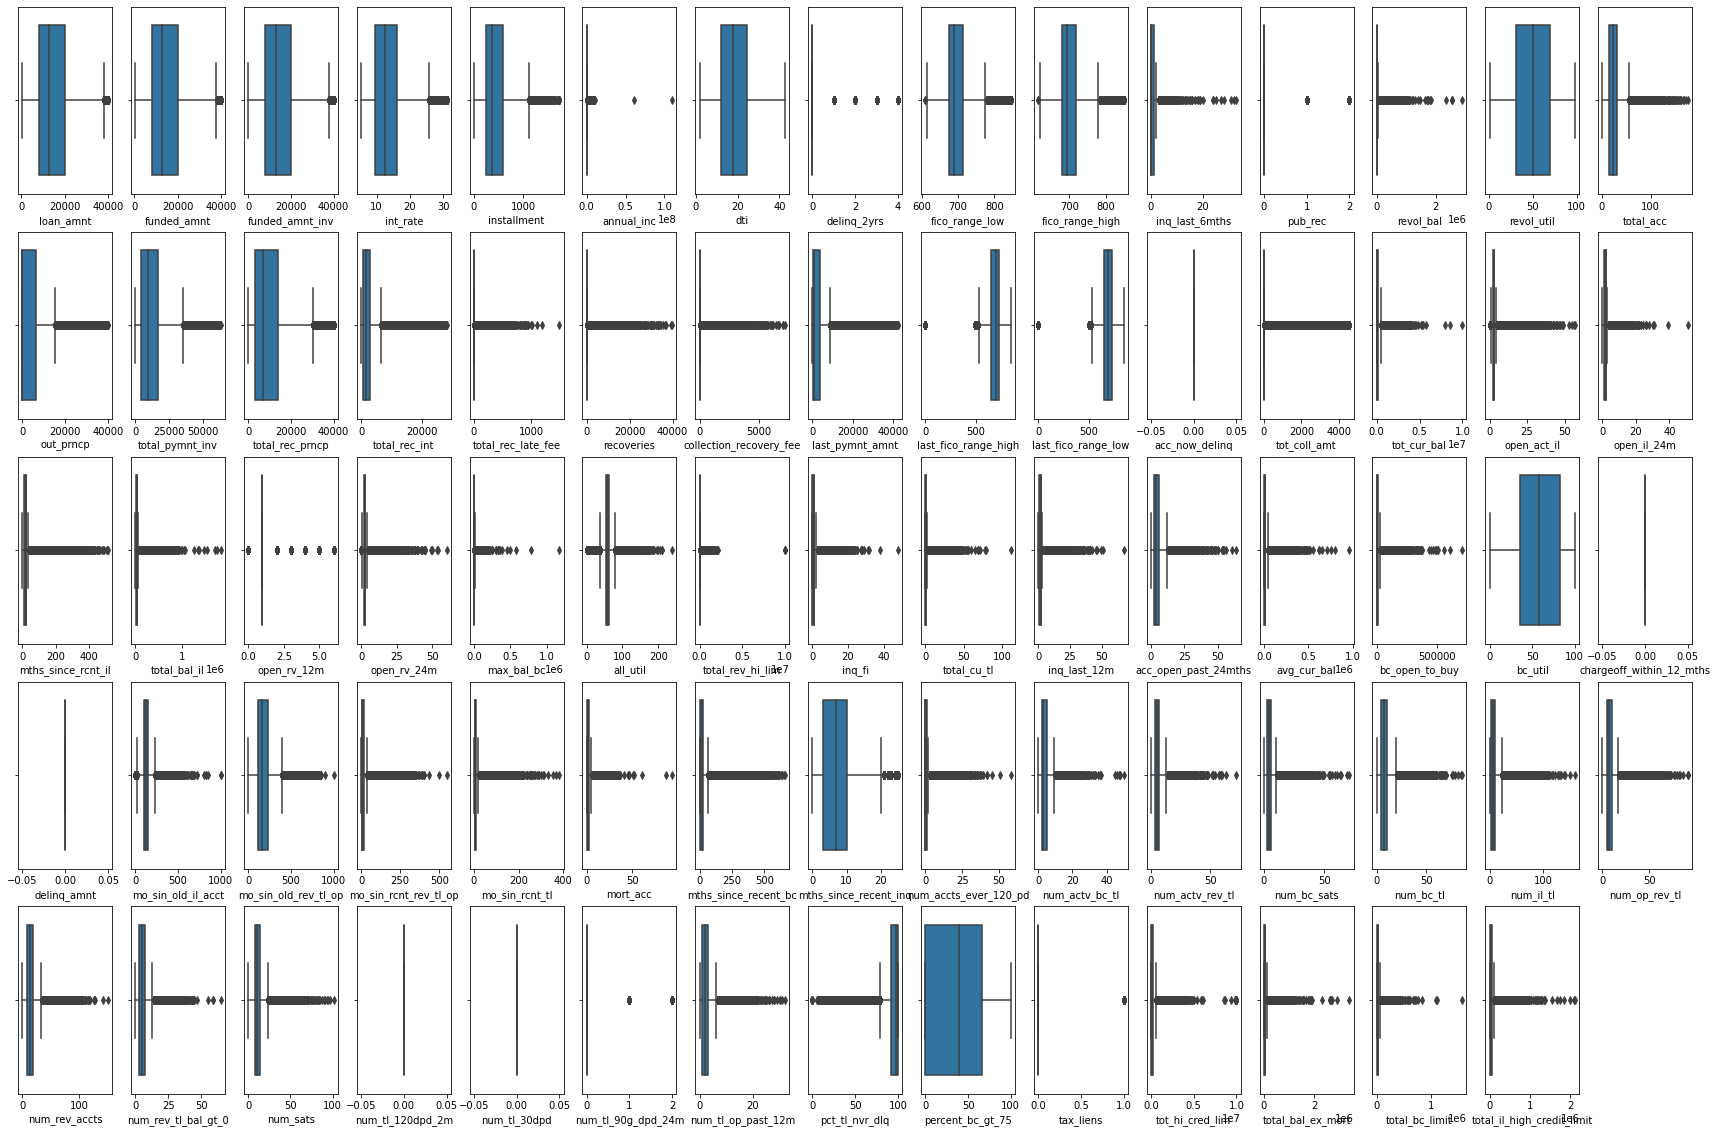

In [ ]:
# replotting boxplot
plt.figure(figsize=(30, 20))
i, j = 5, 15
for k in range(1, 75):
    plt.subplot(i, j, k)
    sns.boxplot(acc_df[num_vars[k - 1]])

In [ ]:
acc_df.delinq_2yrs.quantile([0.8,0.81,0.82,0.85,0.88,0.9,0.99])

0.80    0.0
0.81    0.0
0.82    1.0
0.85    1.0
0.88    1.0
0.90    1.0
0.99    4.0
Name: delinq_2yrs, dtype: float64

above column delinq_2yrs having 80% of its data value 0.0 which has no meaning to use so lets drop these kind of column first

In [ ]:
# dropping the columns who are mostly skewed
acc_df.drop(['delinq_2yrs','pub_rec','acc_now_delinq','tot_coll_amt','open_rv_12m','chargeoff_within_12_mths','delinq_amnt','num_tl_120dpd_2m', 'num_tl_30dpd',
             'num_tl_90g_dpd_24m','tax_liens'],axis=1,inplace=True)

In [ ]:
# Separating the Numerical column from accepted dataset.
num_vars = list(acc_df.columns[acc_df.dtypes == 'float64'])

print(len(num_vars))

63


In [ ]:
# capping the some outlier on 1 percentile and 95 percentile
outlier_cols_95_perc=['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','fico_range_low','fico_range_high','inq_last_6mths','total_acc',
                      'total_pymnt_inv','total_rec_prncp','total_rec_late_fee','last_fico_range_high','last_fico_range_low','tot_cur_bal','acc_open_past_24mths','mo_sin_old_il_acct',
                      'mo_sin_old_rev_tl_op','mort_acc','mths_since_recent_inq','num_actv_bc_tl','num_actv_rev_tl','num_bc_sats','num_bc_tl','num_il_tl','num_op_rev_tl',
                      'num_rev_accts','num_rev_tl_bal_gt_0','num_sats','num_tl_op_past_12m','pct_tl_nvr_dlq','tot_hi_cred_lim']

for cols in acc_df.columns:
    percentiles = acc_df[outlier_cols_95_perc].quantile([0.01, 0.95]).values
    acc_df[outlier_cols_95_perc] = np.clip(acc_df[outlier_cols_95_perc], percentiles[0],percentiles[1])

In [ ]:
# capping the some outlier on 1 percentile and 91 percentile
outlier_cols_91_perc=['revol_bal','out_prncp','total_rec_int','recoveries','collection_recovery_fee','last_pymnt_amnt','open_il_24m','mths_since_rcnt_il',
                      'total_bal_il','open_rv_24m','max_bal_bc','all_util','total_rev_hi_lim','inq_fi','total_cu_tl','inq_last_12m','avg_cur_bal','bc_open_to_buy',
                      'mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl','mths_since_recent_bc','num_accts_ever_120_pd','total_bal_ex_mort','total_bc_limit','total_il_high_credit_limit']

for cols in acc_df.columns:
    percentiles = acc_df[outlier_cols_91_perc].quantile([0.01, 0.91]).values
    acc_df[outlier_cols_91_perc] = np.clip(acc_df[outlier_cols_91_perc], percentiles[0],percentiles[1])

In [ ]:
# capping the some outlier on 1 percentile and 86 percentile
oulier_col_86_per = ['total_bal_il','out_prncp','open_rv_24m','max_bal_bc','all_util','total_cu_tl','inq_last_12m','last_pymnt_amnt','open_act_il']
for cols in acc_df.columns:
    percentiles = acc_df[oulier_col_86_per].quantile([0.01, 0.86]).values
    acc_df[oulier_col_86_per] = np.clip(acc_df[oulier_col_86_per], percentiles[0], percentiles[1])

In [ ]:
# capping the  lower outlier    
percentiles = acc_df['last_fico_range_low'].quantile([0.05,1]).values
acc_df['last_fico_range_low'] = np.clip(acc_df['last_fico_range_low'], percentiles[0], percentiles[1])

percentiles = acc_df['last_fico_range_high'].quantile([0.05,1]).values
acc_df['last_fico_range_high'] = np.clip(acc_df['last_fico_range_high'], percentiles[0], percentiles[1])

percentiles = acc_df['open_rv_24m'].quantile([0.15,1]).values
acc_df['open_rv_24m'] = np.clip(acc_df['open_rv_24m'], percentiles[0], percentiles[1])

percentiles = acc_df['open_act_il'].quantile([0.08,1]).values
acc_df['open_act_il'] = np.clip(acc_df['open_act_il'], percentiles[0], percentiles[1])

percentiles = acc_df['max_bal_bc'].quantile([0.05,1]).values
acc_df['max_bal_bc'] = np.clip(acc_df['max_bal_bc'], percentiles[0], percentiles[1])

percentiles = acc_df['mo_sin_old_il_acct'].quantile([0.05,1]).values
acc_df['mo_sin_old_il_acct'] = np.clip(acc_df['mo_sin_old_il_acct'], percentiles[0], percentiles[1])

percentiles = acc_df['pct_tl_nvr_dlq'].quantile([0.08, 1]).values
acc_df['pct_tl_nvr_dlq'] = np.clip(acc_df['pct_tl_nvr_dlq'], percentiles[0], percentiles[1])

percentiles = acc_df['all_util'].quantile([0.20,1]).values
acc_df['all_util'] = np.clip(acc_df['all_util'], percentiles[0], percentiles[1])

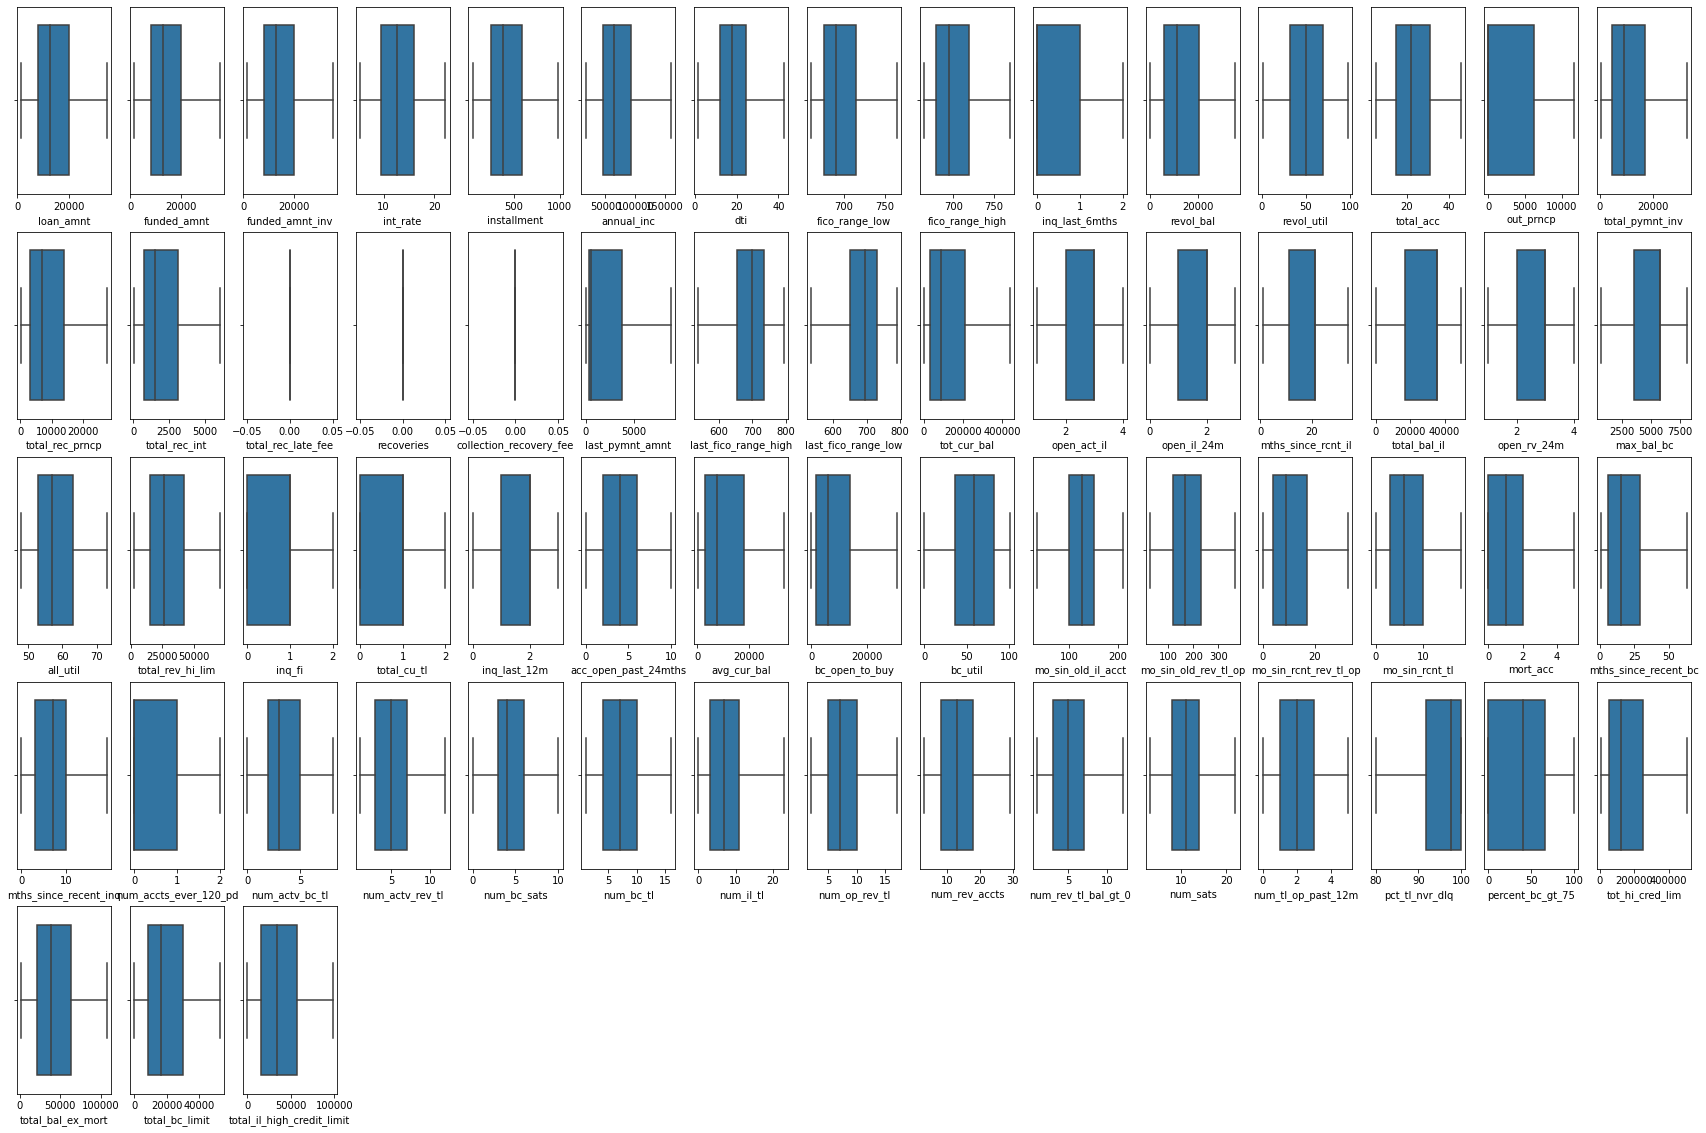

In [ ]:
# plotting boxplot
plt.figure(figsize=(30, 20))
i, j = 5,15
for k in range(1, 64):
    plt.subplot(i, j, k)
    sns.boxplot(acc_df[num_vars[k - 1]])

***All outliers are handled successfully***

# Creating target variable

In [ ]:
# Taking only important loans status:
# .isin() is a trick for checking if something is in a list
acc_df = acc_df.loc[acc_df['loan_status'].isin(['Fully Paid', 'Charged Off','Default'])]

In [ ]:
acc_df.verification_status.value_counts()

Source Verified    521322
Verified           418352
Not Verified       405709
Name: verification_status, dtype: int64

In [ ]:
acc_df['loan_status'].value_counts()

Fully Paid     1076784
Charged Off     268559
Default             40
Name: loan_status, dtype: int64

In [ ]:
# Loan status has too many unique values so instead we are creating a new var taking the default as 1 and rest 0.
target = [1 if i=='Default' else 0 for i in acc_df['loan_status']]
acc_df['target'] = target
acc_df['target'].value_counts()

0    1345343
1         40
Name: target, dtype: int64

There are few columns which denote date or month information but are of the type object in the dataframe. Let's change the dtype of all such columns to datetime. Doing so will help in further using these column values to its best for analysis.

Column term contains either the values " 36 months" or " 60 months".

Transform them to either 0 (36 months) and 1 (60 months)

In [ ]:
print(acc_df.term.unique())
acc_df.term.replace(" 36 months", 0, inplace=True)
acc_df.term.replace(" 60 months", 1, inplace=True)
print(acc_df.term.unique())
acc_df.term.apply(type).value_counts()

[' 36 months' ' 60 months']
[0 1]


<class 'int'>    1345383
Name: term, dtype: int64

In [ ]:
acc_df['issue_d']= pd.to_datetime(acc_df['issue_d'])

**We should convert date object columns to integer years or months so that we can easily encode other categorical features without exhausting our resources. For filling the dates, I am gonna use the most used dates in that feature**

# **Exploratory Data Analysis**

In [ ]:
# Creating a copy of the dataframe for visualizations.
acc_df_rev = pd.DataFrame.copy(acc_df)
rej_df_rev = pd.DataFrame.copy(rej_df)

Which features are common between accepted cases and rejected cases ?

In [ ]:
rejected_columns=rej_df.columns.to_list()
accepted_columns=acc_df.columns.to_list()
[column for column in accepted_columns if column in rejected_columns]

[]

In [ ]:
common_features=pd.DataFrame({"accepted_headings":['loan_amnt','title','dti','zip_code','addr_state','emp_length'],
 "rejected_headings":['Amount Requested','Loan Title','Debt-To-Income Ratio','Zip Code','State','Employment Length']})
common_features

,accepted_headings,rejected_headings
0,loan_amnt,Amount Requested
1,title,Loan Title
2,dti,Debt-To-Income Ratio
3,zip_code,Zip Code
4,addr_state,State
5,emp_length,Employment Length


**Observation:-**
The features are named differently. The number features for Accepted Cases and Rejected cases are different. It is possible that LendingClub could be following a 2 step verification process for approving loans. A quicker set of features to initially reject loans and then a more comprehensive set of features to approve the remaining loans. Also, several new features are monitered to track the status of the loans given. The rejected cases outnumber accepted cases 1:10

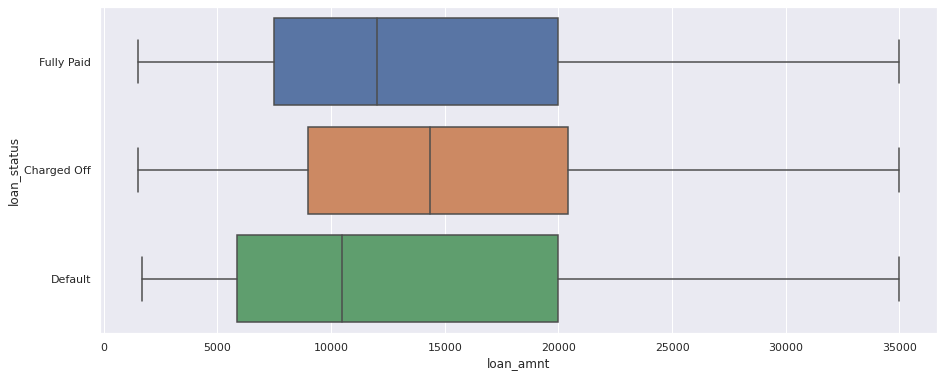

In [ ]:
#Relation between loan amount and loan stataus.
sns.set(rc={'figure.figsize':(15,6)})
sns.boxplot(x='loan_amnt', y='loan_status', data=acc_df)

**Observation:**

Those who are Fully paid and charged off are having the higher amount of loans.

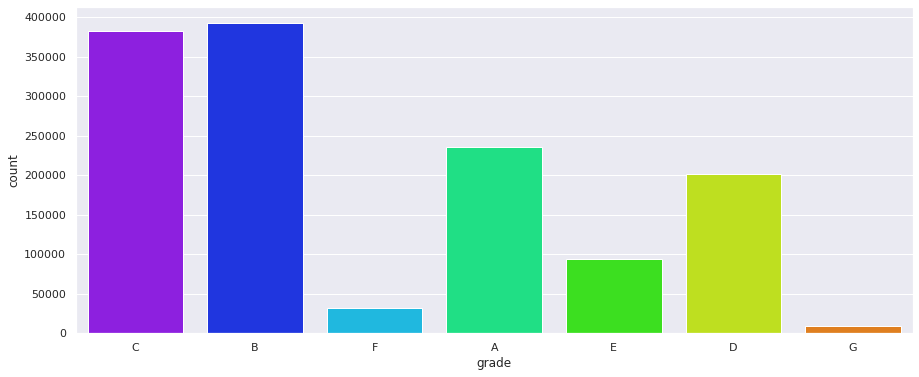

In [ ]:
# Grade visualization
sns.set(rc={'figure.figsize':(15,6)})
sns.countplot(acc_df['grade'], palette='gist_rainbow_r')

**Observation:**

Since most of the loans are of B Grade, we should have a look at their loan amounts too

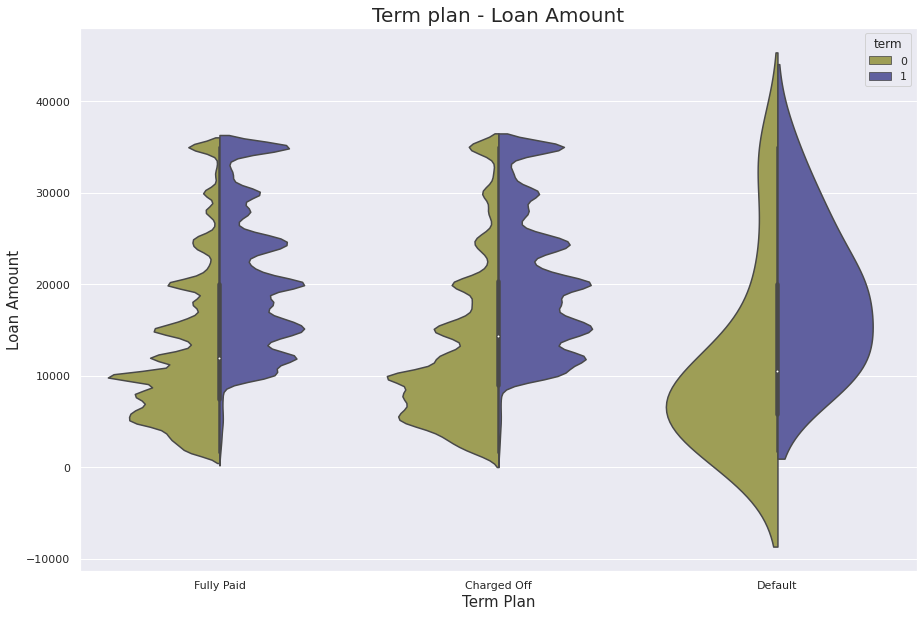

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
sns.violinplot(x="loan_status",y="loan_amnt",data=acc_df, hue="term", split=True,palette='gist_stern_r')
plt.title("Term plan - Loan Amount", fontsize=20)
plt.xlabel("Term Plan", fontsize=15)
plt.ylabel("Loan Amount", fontsize=15);

**Observation:**

As expected, people who have defaulted their loans had high term plan

**Let us see graphs of some other important variables**

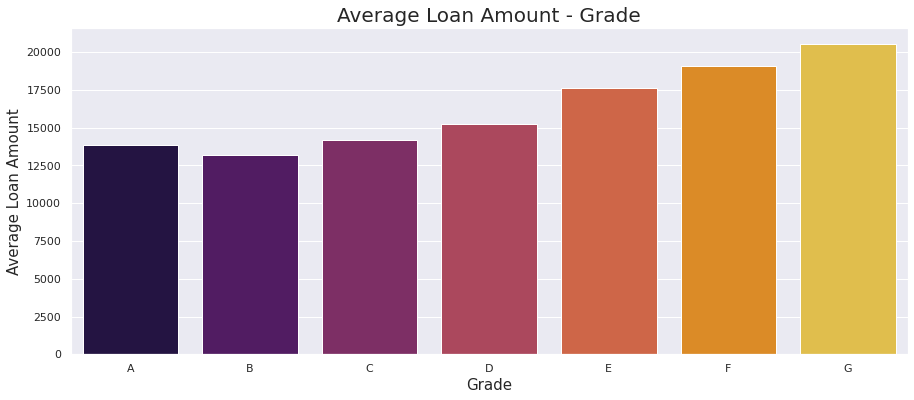

In [ ]:
loan_grades = acc_df.groupby("grade").mean().reset_index()
sns.set(rc={'figure.figsize':(15,6)})
sns.barplot(x='grade', y='loan_amnt', data=loan_grades, palette='inferno')
plt.title("Average Loan Amount - Grade", fontsize=20)
plt.xlabel("Grade", fontsize=15)
plt.ylabel("Average Loan Amount", fontsize=15);

**Observation:**

Average loan amount of B grade loans is the least of all grades. I guess the higher the grade, lower the loan amount is issued.

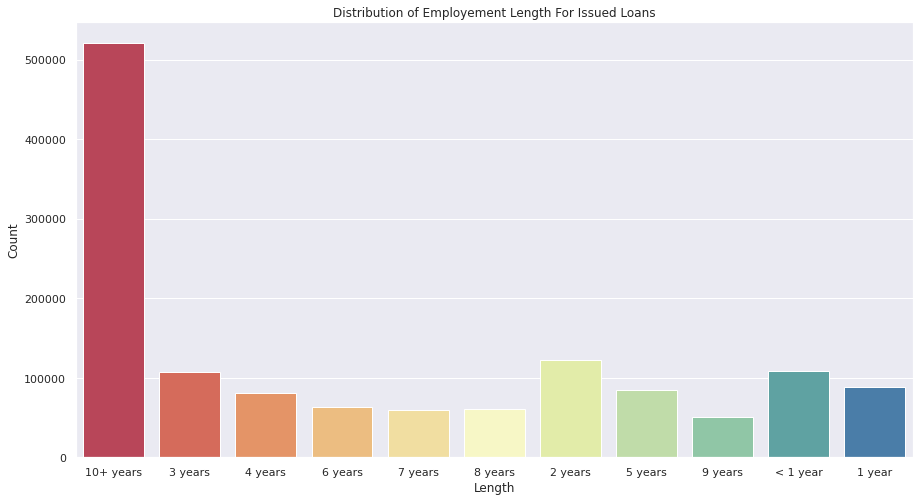

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
sns.countplot(acc_df['emp_length'],palette='Spectral')
plt.xlabel("Length")
plt.ylabel("Count")
plt.title("Distribution of Employement Length For Issued Loans")
plt.show()

**Observation:**

Well, it can be seen that people who have worked for 10 or more years are more likely to take loans

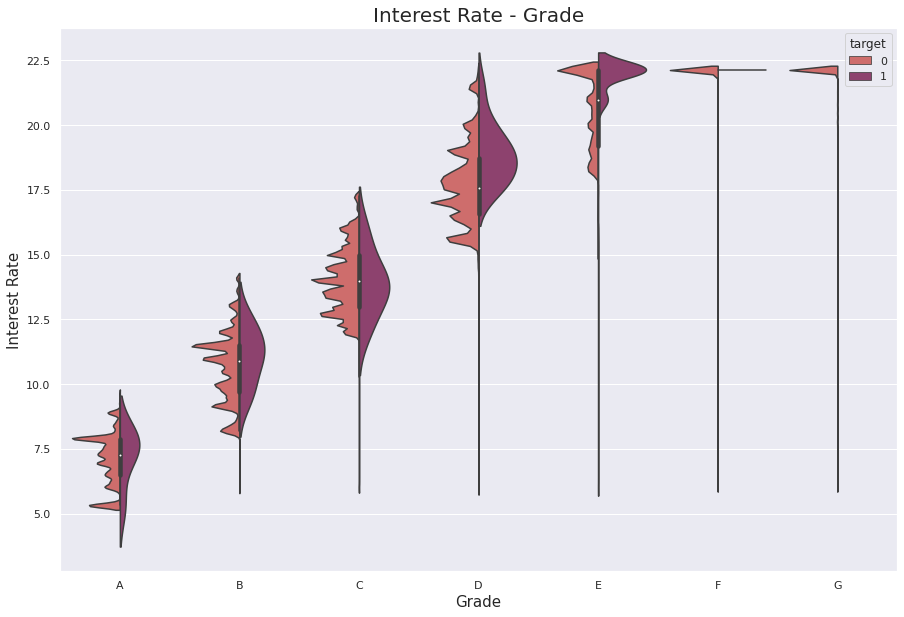

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
sns.violinplot(x="grade", y="int_rate", data=acc_df, palette='flare', order="ABCDEFG",hue='target',split=True)
plt.title("Interest Rate - Grade", fontsize=20)
plt.xlabel("Grade", fontsize=15)
plt.ylabel("Interest Rate", fontsize=15);

The higher the loan amount, higher the interest rate.

**Overall distribution of interest rates now.**

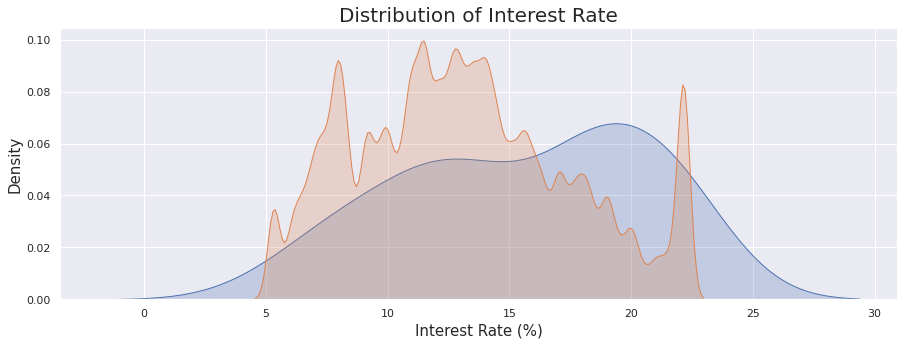

In [ ]:
sns.set(rc={'figure.figsize':(15,5)})
sns.kdeplot(acc_df.loc[acc_df['target'] == 1, 'int_rate'], label = 'target = 1',shade=True)
sns.kdeplot(acc_df.loc[acc_df['target'] == 0, 'int_rate'], label = 'target = 0',shade=True);
plt.xlabel('Interest Rate (%)',fontsize=15)
plt.ylabel('Density',fontsize=15)
plt.title('Distribution of Interest Rate',fontsize=20);

**To find the correlation between all variables**

In [ ]:
df_corr=acc_df

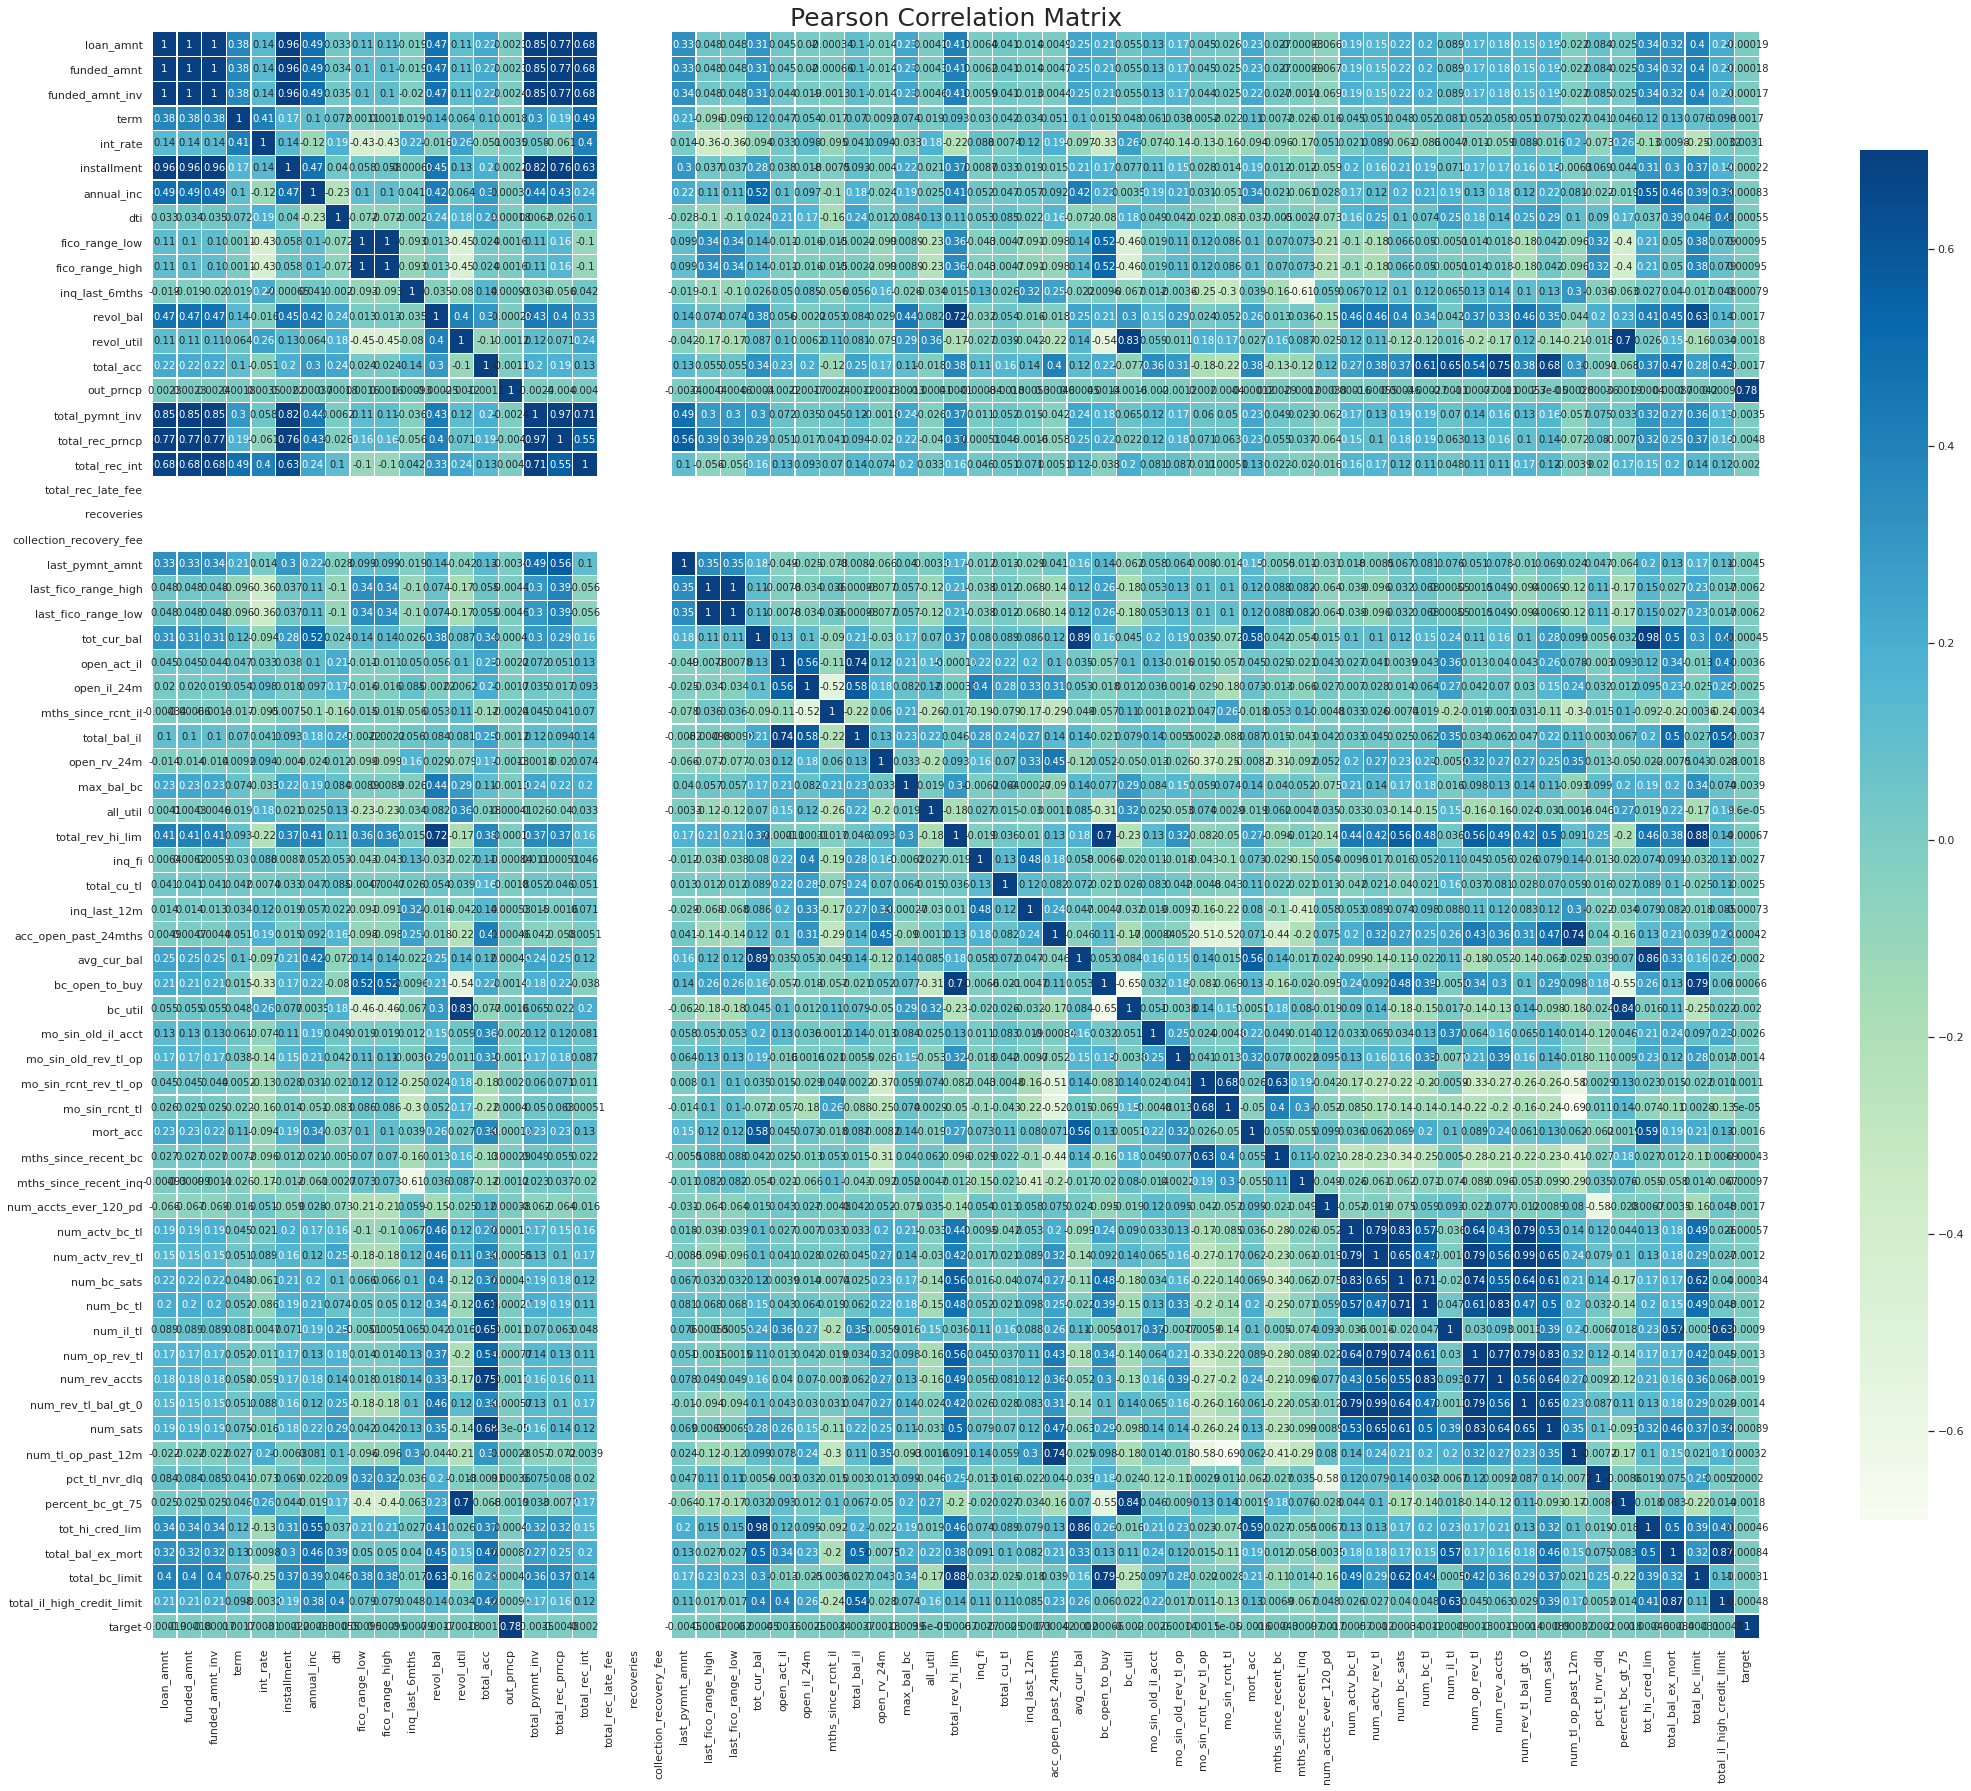

In [ ]:
sns.set(style="whitegrid", font_scale=1)

plt.figure(figsize=(36,36))
plt.title('Pearson Correlation Matrix',fontsize=25)
sns.heatmap(df_corr.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="GnBu",linecolor='w',
            annot=True, annot_kws={"size":10}, cbar_kws={"shrink": .7})

**Distribution of Employement Length For Issued Loans**

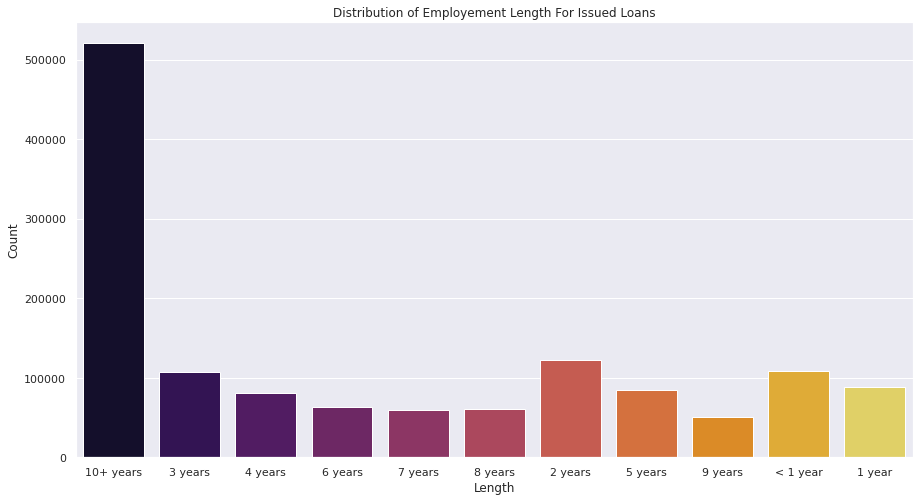

In [ ]:
df3=acc_df
sns.set(rc={'figure.figsize':(15,8)})
sns.countplot(df3['emp_length'],palette='inferno')
plt.xlabel("Length")
plt.ylabel("Count")
plt.title("Distribution of Employement Length For Issued Loans")
plt.show()

Summary

Since most of the customers have been employed for 10+ years, the majority of Lending Club's customers are 30+ years of age.

Interest rate varies wildly, reaching nearly 30% for high-risk loans.

Grade A has the lowest interest rate around 7%.

Grade G has the highest interest rate.

The lower the grade, the higher loan amount loan issued.

Fully Paid loans tend to be smaller. This could be due to the age of the loans.

Default has the highest count among other loan status.
In Grace Period and Late(16~30 days) have the highest loan amount and mean.

Most of the loans have interest rates between 12% and 18%
All the loans that have been defaulted are from individuals rather than from two or more people.

States are not a distinguishing feature for predicting the defaulted loans. 

# **Univariate and Segmented Analysis**

**Define a few methods to aid in plotting graphs**

In [ ]:
master_loan = acc_df_rev[acc_df_rev['loan_status'].isin(['Fully Paid','Charged Off'])]
master_loan.shape

(1345343, 78)

In [ ]:
## Wonderful solution to show labels in bar plots - copied from https://stackoverflow.com/a/48372659 and edited
def showLabels(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.1f}%".format(y_value)
        else:
            try:
              label = "{:.1f}%".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}%".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [ ]:
# This function plots a given column buckets against loan_status (default = 'Charged Off')
# The plots are in percentages 
# (absolute numbers do not make sense -> category values can have very different absolute numbers)
# We want to see what are the chances of some category leading to loan default
# Absolute numbers are also printed to assess level of confidence in a % value. 
def plotLoanStatus(dataframe, by, loanstatus='Charged Off'):
    grp = dataframe.groupby(['loan_status',by])[by].count()
    cnt = dataframe.groupby(by)[by].count()
    #print(grp)
    percentages = grp.unstack() * 100 / cnt.T
    #print(percentages)
    ax = percentages.loc[loanstatus].plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% of loans ' + loanstatus)
    showLabels(ax, grp[loanstatus].to_dict())
    plt.margins(0.2, 0.2)
    plt.tight_layout()
    return ax

In [ ]:
# This method plots a distribution of target column, and its boxplot against loan_status column
def plot_distribution(dataframe, col):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    ax = sns.distplot(dataframe[col])
    plt.subplot(1, 2, 2)
    sns.boxplot(x=dataframe[col], y=dataframe['loan_status'], data=dataframe)
    plt.show()

In [ ]:
# This method prints two plots side by side 
# Left one is percentage of a categorical variable in the entire dataset 
# Right one is percentage for Charged Off loans 
# Significant changes in percentage from left to right can indicate a value of interest
def plot_percentages(dataframe, by, sortbyindex=False):
    plt.subplot(1, 2, 1)
    values = (master_loan[by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% in dataset', fontsize=16)
    ax.set_xlabel(by, fontsize=12)
    showLabels(ax)
    plt.subplot(1, 2, 2)
    #ax = master_loan.groupby('loan_status')['term'].value_counts(normalize=True).loc[:'Charged Off'].plot.bar(color=sns.color_palette('husl', 16))
    values = (master_loan.loc[master_loan['loan_status']=='Charged Off'][by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% in Charged Off loans', fontsize=16)
    f
    showLabels(ax)

In [ ]:
(master_loan['grade'].value_counts(normalize=True)*100).sort_index()

A    17.474354
B    29.195083
C    28.370906
D    14.936934
E     6.961050
F     2.382887
G     0.678786
Name: grade, dtype: float64

**The key column - loan_status**

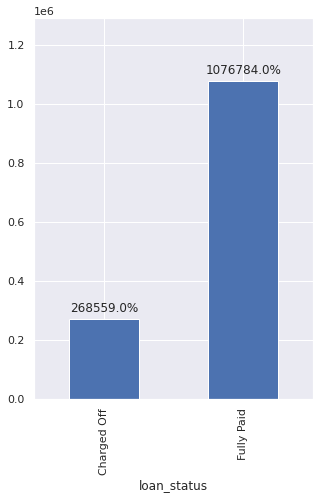

In [ ]:
plt.figure(figsize=(5,7))
ax = master_loan.groupby('loan_status').loan_amnt.count().plot.bar()
showLabels(ax)
plt.show()

In [ ]:
#Create Derived categorical variable
master_loan['loan_amnt_bin'] = pd.cut(master_loan['loan_amnt'], 
                                      [x for x in range(0, 36000, 5000)], labels=[str(x)+'-'+str(x+5)+'k' for x in range (0, 35, 5)])

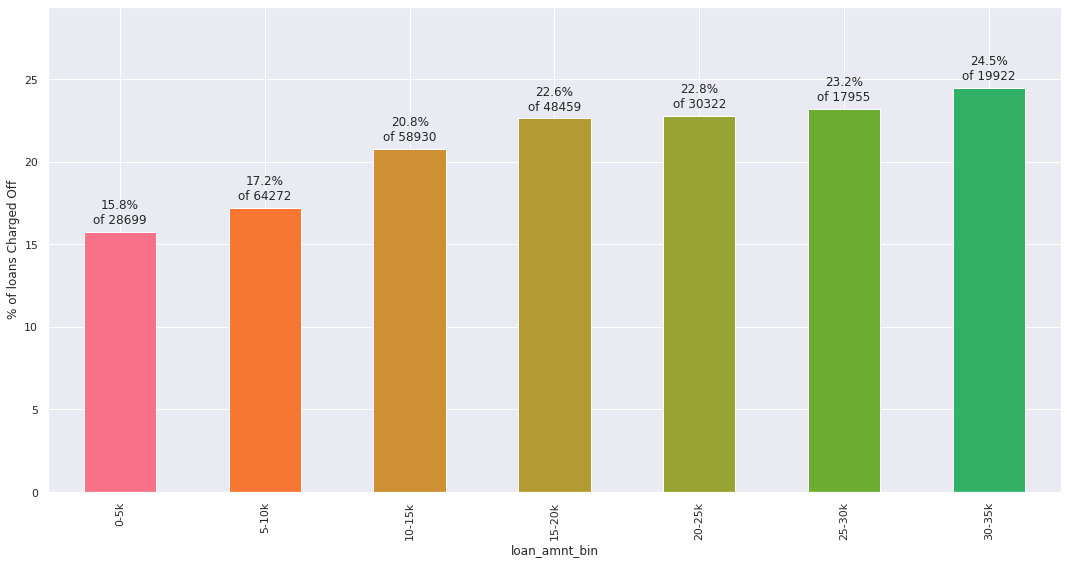

In [ ]:
plotLoanStatus(master_loan, 'loan_amnt_bin')

Observation:

The % of charged off loans increases substancially as we go up the loan amount buckets. Most loans are below 20000 amount. The higher loans, though lesser in number, carry a substantially higher risk of default.

Other categorical variables distribution
Let's see how some other categorical variables of interest are distributed within the dataset.

In [ ]:
def categoricalBarPlots(df, arr):
    rows = int(len(arr)/2)
    for idx, val in enumerate(arr, start=1):
        plt.subplot(rows, 3, idx)
        ax = df.groupby(val).loan_amnt.count().plot.bar(color=sns.color_palette('husl', 16))
        showLabels(ax)

    plt.tight_layout()

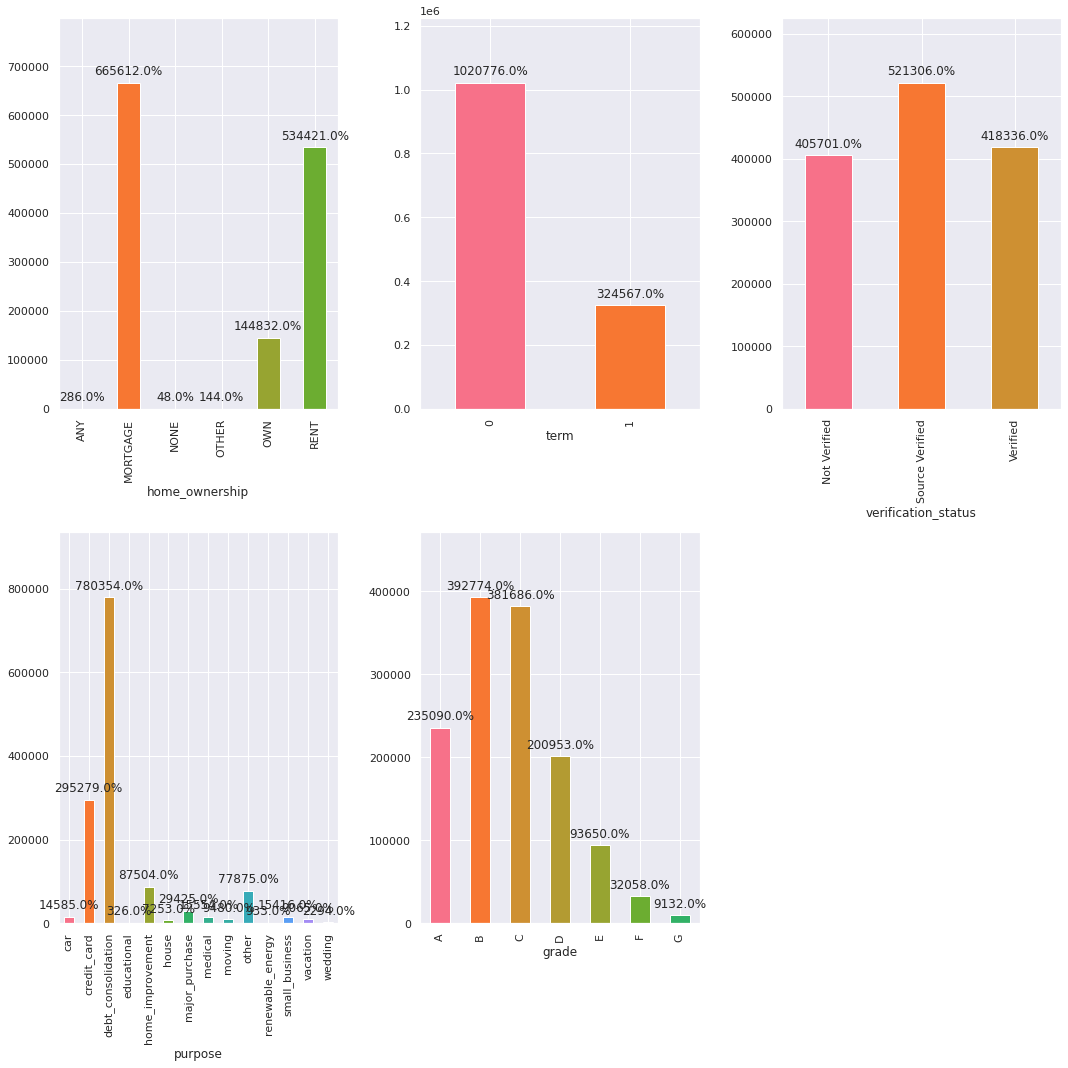

In [ ]:
plt.figure(figsize=(15,15))

categoricalBarPlots(master_loan, ['home_ownership', 'term', 'verification_status', 'purpose', 'grade'])

**Obervation**

Most loans are for 36 month term Very few loans are extended to people with prior record of bankruptcy.

Debt_consolidation is by far the largest 'purpose' for seeking a loan Most approved loans are high grade

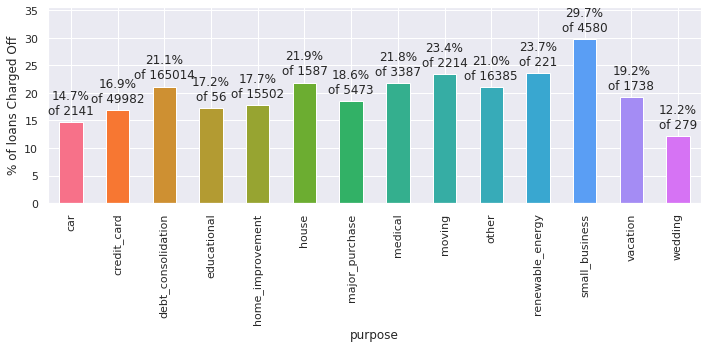

In [ ]:
plt.figure(figsize=(10, 5))
plotLoanStatus(master_loan, 'purpose')

Observation:

Approximately 30% of the loans are issued for the purpose of small business.
23% of the loans for renewable_enrgy are charged Off, but the number is too less to be of significance.


**Variable: installment**

Data_Dictionary: The monthly payment owed by the borrower if the loan originates. 

In [ ]:
master_loan.installment.describe()

count    1.345343e+06
mean     4.311445e+02
std      2.428009e+02
min      5.346000e+01
25%      2.484800e+02
50%      3.754300e+02
75%      5.807300e+02
max      9.844600e+02
Name: installment, dtype: float64

<Figure size 1080x360 with 0 Axes>

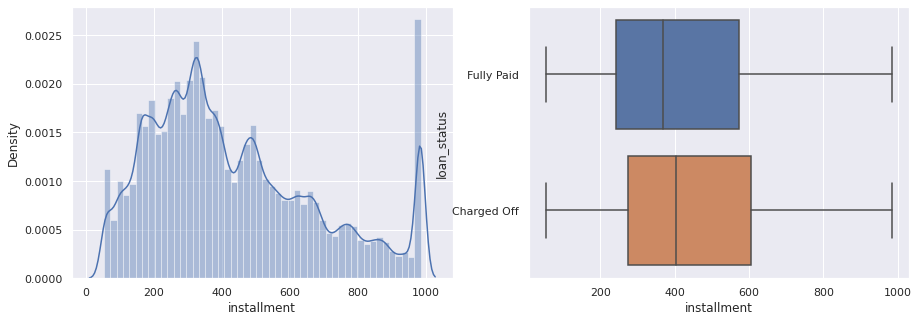

In [ ]:
plt.figure(figsize=(15,5))
plot_distribution(master_loan, 'installment')

**Variable - emp_title**

Data_Dictionary: The job title supplied by the Borrower when applying for the loan.

In [ ]:
top10_emp_title = master_loan.emp_title.value_counts(normalize=False).head(10)
top10_emp_title

Teacher             21268
Manager             19470
Owner               10302
Registered Nurse     8774
RN                   8522
Supervisor           8289
Driver               7558
Sales                7487
Project Manager      6381
Office Manager       5526
Name: emp_title, dtype: int64

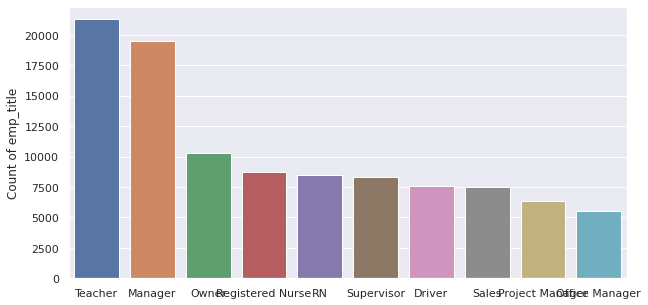

In [ ]:
plt.figure(figsize=(10,5))
a=sns.barplot(x=top10_emp_title.index, y=top10_emp_title.values)
a.set_ylabel('Count of emp_title')
plt.show()

**Observation:**

Max of the loan takers are from the Tachers, then Manager follwed by Ownerand Registered Nurse.

**Variable - addr_state**

Data_Dictionary: The state provided by the borrower in the loan application

In [ ]:
master_loan.addr_state.value_counts(normalize=True).head(10)

CA    0.146084
TX    0.081891
NY    0.081648
FL    0.071066
IL    0.038445
NJ    0.036013
PA    0.033838
OH    0.032589
GA    0.032242
VA    0.028276
Name: addr_state, dtype: float64

**Variable - last_pymnt_amnt**

Data_Dictionary: Last total payment amount received.

In [ ]:
master_loan.last_pymnt_amnt.describe()

count    1.345343e+06
mean     3.678078e+03
std      3.564970e+03
min      7.500000e+00
25%      3.985200e+02
50%      2.042260e+03
75%      8.250430e+03
max      8.812110e+03
Name: last_pymnt_amnt, dtype: float64

In [ ]:
master_loan['last_pymnt_amnt_log'] = master_loan['last_pymnt_amnt'].apply(lambda x : np.log(x+1))

<Figure size 1080x360 with 0 Axes>

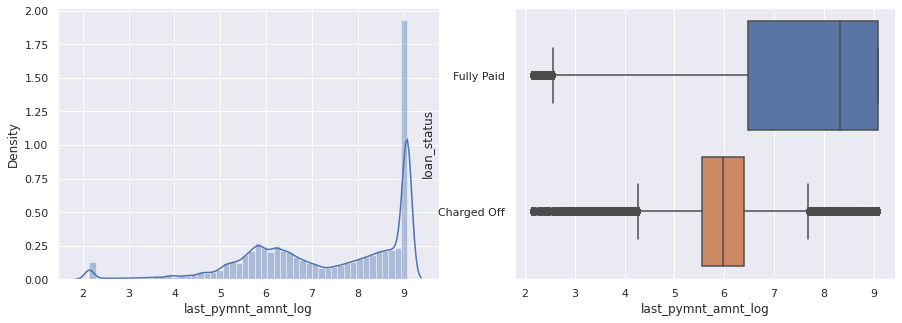

In [ ]:
plt.figure(figsize=(15,5))

plot_distribution(master_loan, 'last_pymnt_amnt_log')
plt.show()

Observation:

The last Payment amount received is significantly lower for Charged Off loans as compared to that of Fully Paid loans. 

# **Bivariate Analysis**

**Loan_amnt over time**

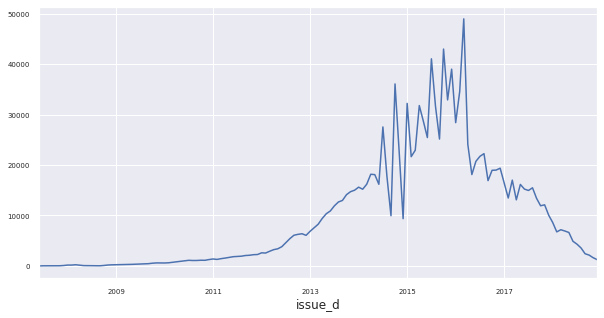

In [ ]:
plt.figure(figsize=(10,5))
acc_df.groupby('issue_d').loan_amnt.count().plot(kind='line', fontsize=7)
plt.show()

**Avg. loan_amnt over time**

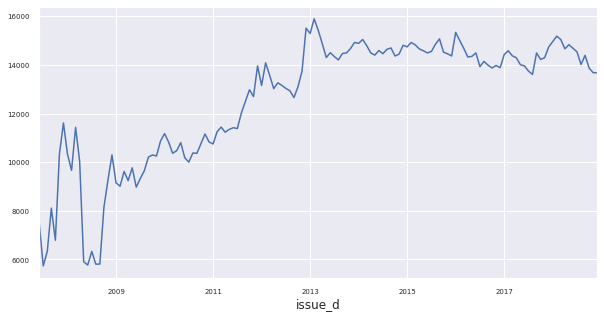

In [ ]:
plt.figure(figsize=(10,5))
acc_df.groupby('issue_d').loan_amnt.mean().plot(kind='line', fontsize=7)
plt.show()


Observation:

Average loan amount is increasing sharply accross time.

**loan_amnt and annual_inc**

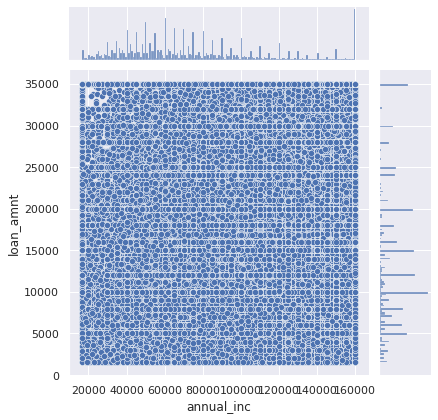

In [ ]:
sns.jointplot('annual_inc', 'loan_amnt', acc_df.loc[acc_df['annual_inc']<260000])
plt.show()

Observation:

It seems as the avg income is different for each and every indiviual according
to their annual income. 

**loan_amnt vs grade**

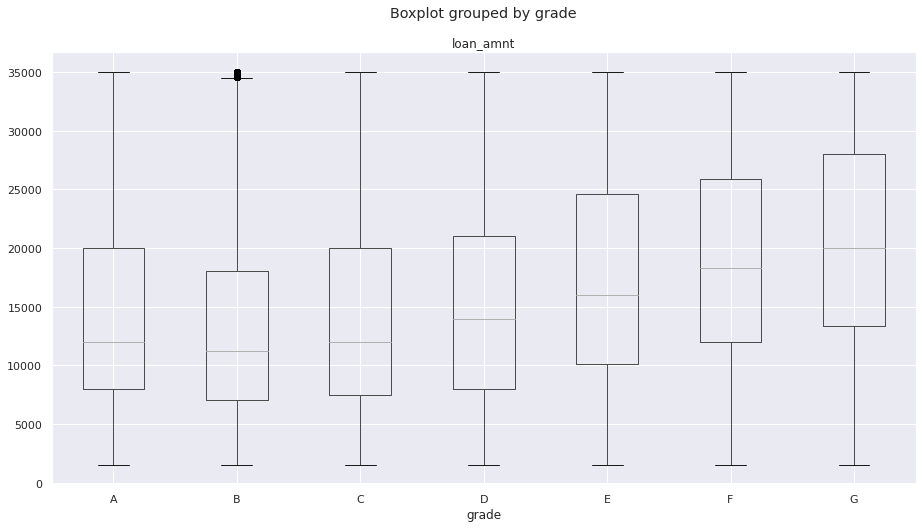

In [ ]:
acc_df.boxplot(column='loan_amnt', by='grade')
plt.show()

Larger loans generally appear to be given a lower grade, with the median loan amount for a grade G loan being almost 5000 higher than that of a grade A, B, or C loan.

**loan_amnt vs verification_status vs loan status**

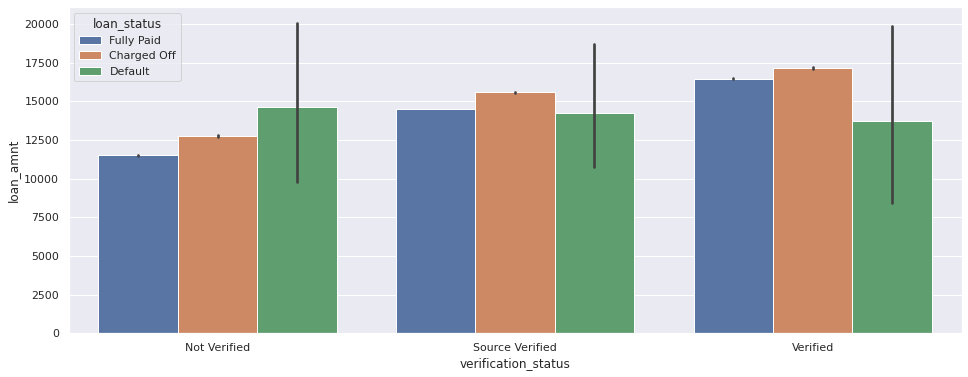

In [ ]:
plt.figure(figsize = (16,6))
sns.barplot(x='verification_status', y='loan_amnt', hue="loan_status", data=acc_df, estimator=np.mean)

Observation:

Higher loan amounts are Verified more often.
We already know that larger loans are less in number, but see a higher charge off rate.

It's not the verified status per se, it's the fact that higher loan amounts are riskier and are also verified more often by Lending Club.

**Interest Rate and Term**

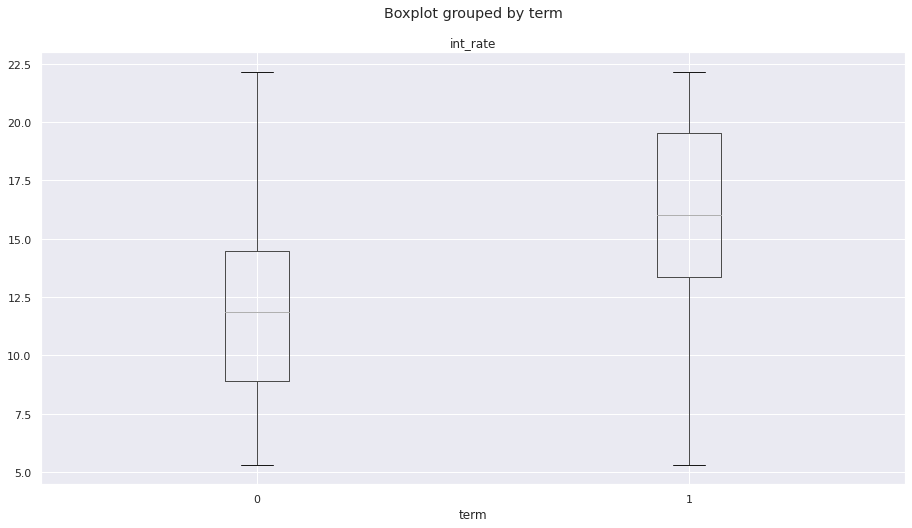

In [ ]:
acc_df.boxplot(column='int_rate', by='term')
plt.show()
#Here 0 indicates 36 months and 1 is 60 months

Observation:

Intrest rates are besed on term. Larger amounts were seen to be given for higher term. Ther rate of intrest associated with them is also high.

Interest Rate and  Grade

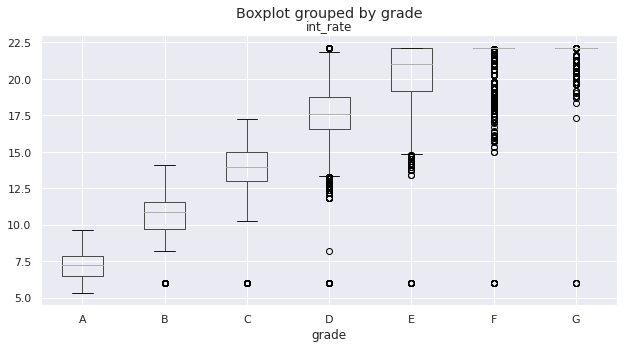

In [ ]:
acc_df.boxplot(column='int_rate', by='grade',figsize=(10,5))
plt.show()

Observation:

Intrest rates varies directly with the grade. Larger or worst the grade, higher are the rate of intrest for the loan.

**Loan amount vs Grade vs Term**

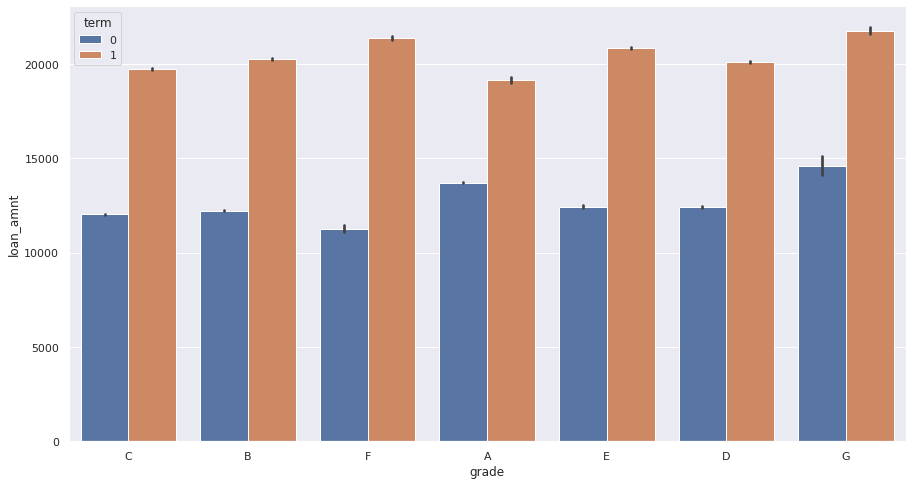

In [ ]:
sns.barplot(x='grade', y='loan_amnt', hue="term", data=acc_df, estimator=np.mean)
plt.show()


Observation:

Our assumption made during univariate analysis is more evident with this plot. Higher loan amount are associated with higher and  lower grade for longer terms.

**Loan amount Vs term Vs Loan Status**

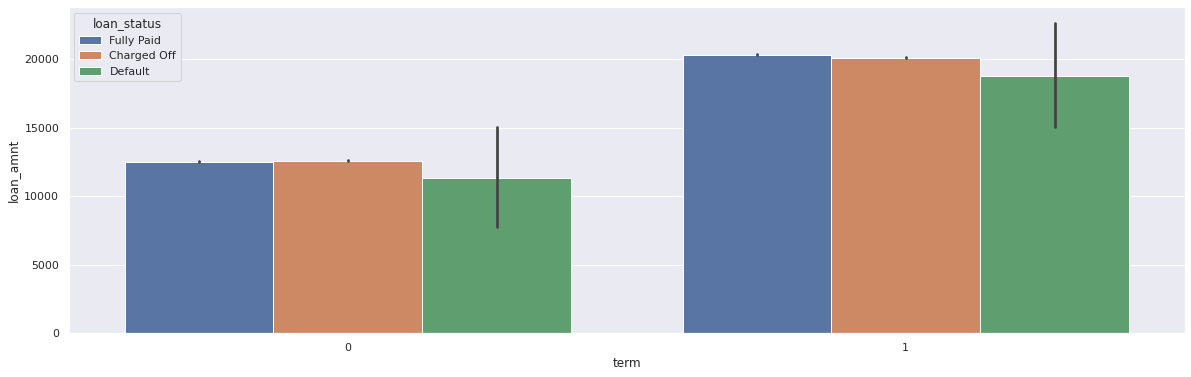

In [ ]:
plt.figure(figsize = (20,6))
sns.barplot(x='term', y='loan_amnt', hue="loan_status", data=acc_df, estimator=np.mean)
plt.show()

Observation:

Our assumption made during univariate analysis is more evident with this plot. Higher loan amount are associated with longer terms and see higher Charge Offs.

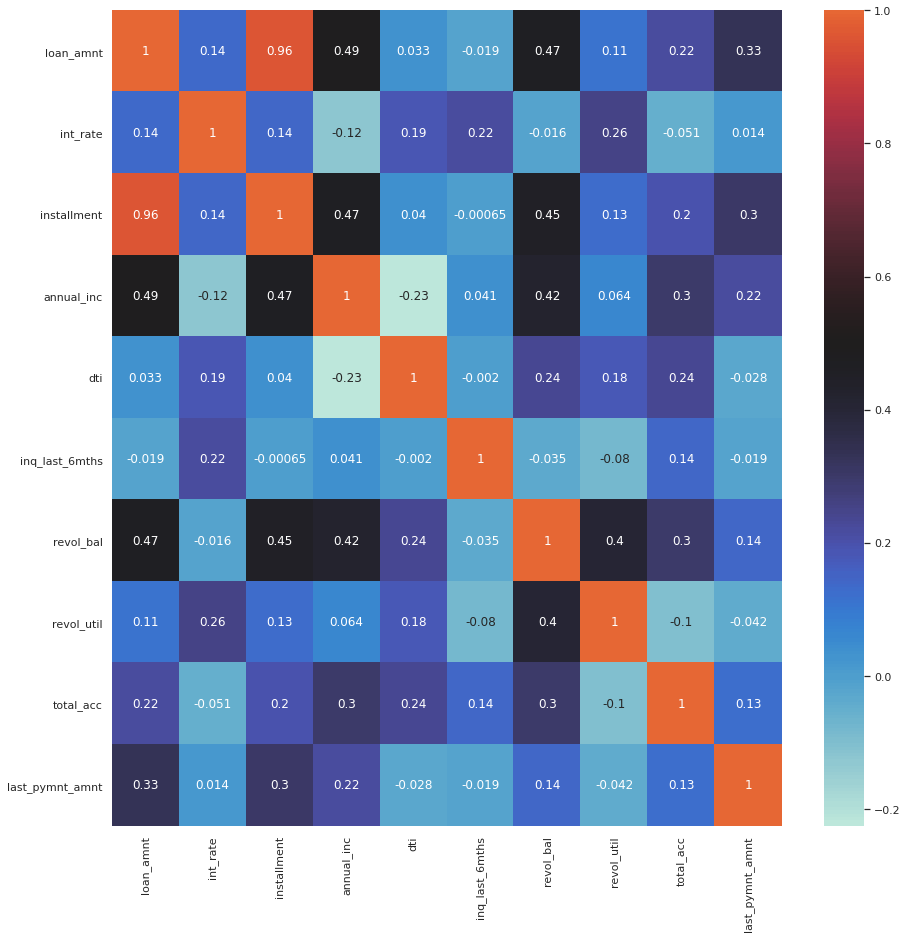

In [ ]:
plt.figure(figsize=(15,15))
cont_var= ['loan_amnt', 'int_rate', 'installment',
       'emp_length', 'annual_inc',
       'dti', 'earliest_cr_line',
       'inq_last_6mths', 'revol_bal', 'revol_util',
       'total_acc', 'last_pymnt_amnt', 'last_credit_pull_d']
corr = acc_df[cont_var].corr()
sns.heatmap(corr, annot=True, center=0.5)

Observation:

loan_amnt is correlated to installment factor.
int_rate is correlated to revol_util with r factor of -0.29 which is negatively correlated. This is good, as company is charging higher interest from riskier loan.


# **Let's Do some EDA for Rejected Data**

**Using the copy data for eda as the original data rej_df is free of missing data and null values.**

In [ ]:
rej_df_rev=rej_df
rej_df_rev.head()

,Amount Requested,Application Date,Loan Title,Debt-To-Income Ratio,Employment Length
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,10%,4 years
1,1000.0,2007-05-26,Consolidating Debt,10%,< 1 year
2,11000.0,2007-05-27,Want to consolidate my debt,10%,1 year
3,6000.0,2007-05-27,waksman,38.64%,< 1 year
4,1500.0,2007-05-27,mdrigo,9.43%,< 1 year


**Renaming the columns so that it would be easier to call them on during the graphs.**

In [ ]:
rej_df_rev = rej_df_rev.rename(columns={'Amount Requested':'Amount_Requested', 'Application Date' : 'Application_Date',
                               'Loan Title': 'Loan_Title','Debt-To-Income Ratio' : 'Debt-To-Income_Ratio','Zip Code':'Zip_Code',
                               'Employment Length':'Employment_Length', 'Policy Code':'Policy_Code'})

In [ ]:
rej_df_rev.dtypes

Amount_Requested        float64
Application_Date         object
Loan_Title               object
Debt-To-Income_Ratio     object
Employment_Length        object
dtype: object

In [ ]:
rej_df_rev.columns

Index(['Amount_Requested', 'Application_Date', 'Loan_Title',
       'Debt-To-Income_Ratio', 'Employment_Length'],
      dtype='object')

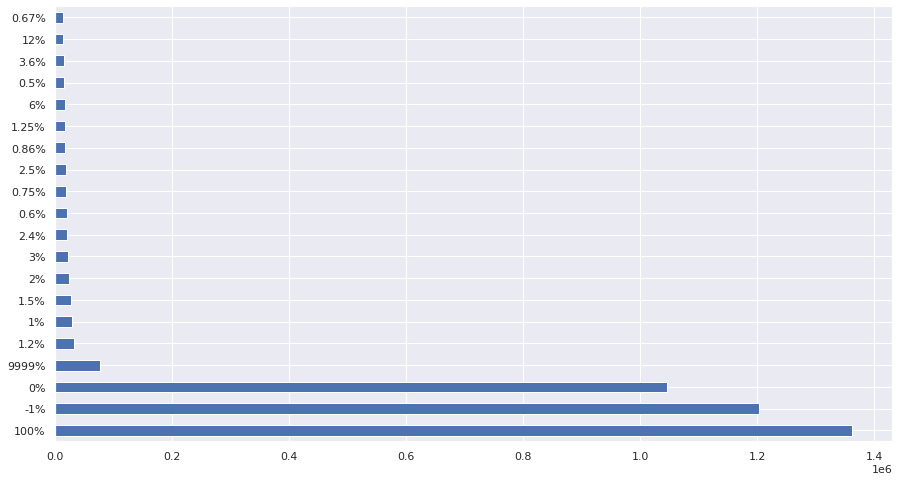

In [ ]:
df=rej_df_rev
df['Debt-To-Income_Ratio'].value_counts()[:20].plot(kind='barh')

**Variable - Loan Title**

In [ ]:
top10_loan_title = rej_df_rev.Loan_Title.value_counts(normalize=False).head(10)
top10_loan_title

Debt consolidation         6419319
debt_consolidation         5895211
Other                      2656222
Credit card refinancing    2298199
other                      2042528
credit_card                1363406
Car financing               762045
home_improvement            718901
car                         527076
Home buying                 493054
Name: Loan_Title, dtype: int64

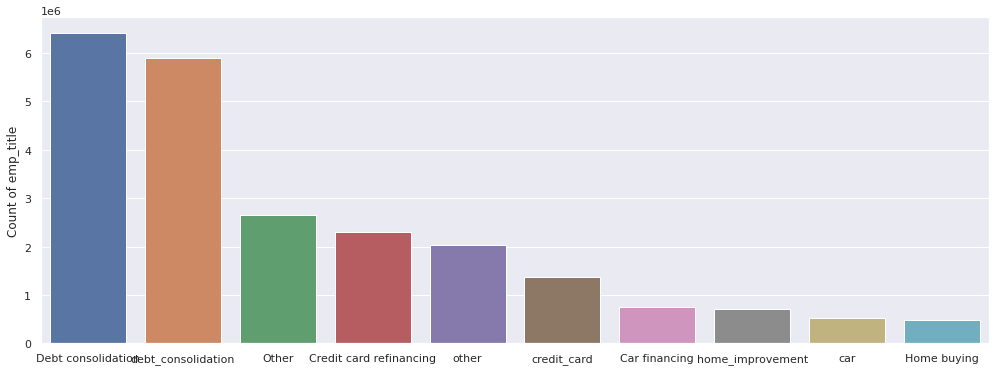

In [ ]:
plt.figure(figsize=(17,6))
a=sns.barplot(x=top10_loan_title.index, y=top10_loan_title.values)
a.set_ylabel('Count of emp_title')
plt.show()

Observation:

As you notice in the above graph the top loan taken is for debt consolidation and so on.

**Variable : Employment length**

In [ ]:
rej_df_rev.Employment_Length.value_counts()

< 1 year     23945670
5 years       2279466
10+ years      416384
1 year         267840
2 years        199204
3 years        177344
4 years        121623
6 years         71625
8 years         65965
7 years         55666
9 years         47954
Name: Employment_Length, dtype: int64

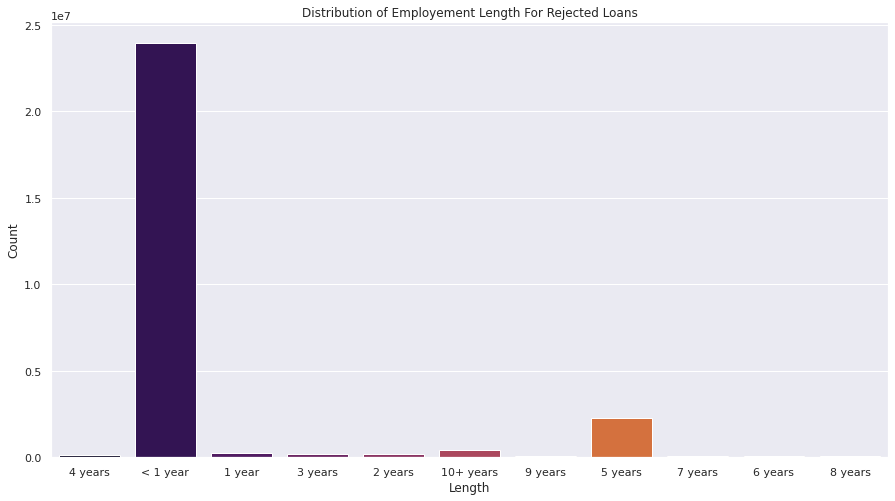

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
sns.countplot(rej_df_rev['Employment_Length'],palette='inferno')
plt.xlabel("Length")
plt.ylabel("Count")
plt.title("Distribution of Employement Length For Rejected Loans")
plt.show()

Observation:
As you notice that the rejected loans are mostly for those who have less than 1 year of experience which is the highest.

**Variable : Application Date**

In [ ]:
rej_df_rev['Application_Date'] = pd.to_datetime(rej_df_rev['Application_Date'])

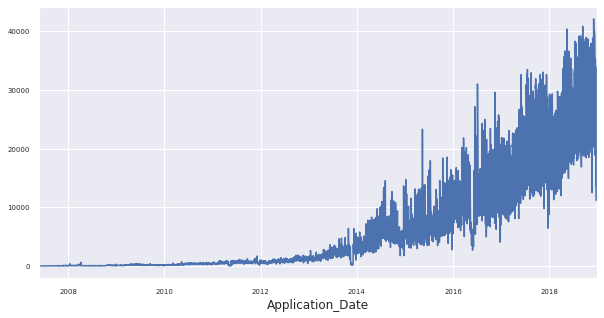

In [ ]:
plt.figure(figsize=(10,5))
rej_df_rev.groupby('Application_Date').Amount_Requested .count().plot(kind='line', fontsize=7)
plt.show()

It seems as if lot of application started increasing after 2014.

In [ ]:
#As this variable was only taken for visualization we can drop it.
acc_df = acc_df.drop(['target'], axis=1)

# **Label Encoding**

In [ ]:
# "Fit" is responsible to create dictionaries 
# "Transform" helps to map the variables and convert the categorical variables into numerical variables
# For pre-processing the data
# categorical_features.columns

from sklearn.preprocessing import LabelEncoder

cols = ['term', 'grade', 'emp_title', 'emp_length', 'home_ownership',
       'verification_status', 'loan_status', 
       'purpose', 'addr_state', 'earliest_cr_line', 'initial_list_status',
       'last_credit_pull_d']

for i in cols:
    lbl= LabelEncoder()
    lbl.fit(list(acc_df[i].values))
    acc_df[i]= lbl.transform(list(acc_df[i].values))

In [ ]:
# Check correlation between Loan_status and all other independent variables
correlation_m = acc_df.corr()
correlation_m["loan_status"].sort_values(ascending=False)

loan_status                   1.000000
last_fico_range_high          0.670298
last_fico_range_low           0.670297
total_rec_prncp               0.462702
last_pymnt_amnt               0.449823
total_pymnt_inv               0.329978
fico_range_low                0.132386
fico_range_high               0.132386
bc_open_to_buy                0.091097
avg_cur_bal                   0.085652
tot_hi_cred_lim               0.082345
mort_acc                      0.078678
total_bc_limit                0.076837
tot_cur_bal                   0.072963
mo_sin_rcnt_tl                0.067397
annual_inc                    0.066060
total_rev_hi_lim              0.064952
mo_sin_rcnt_rev_tl_op         0.062358
mths_since_recent_bc          0.060646
mths_since_recent_inq         0.055093
mo_sin_old_rev_tl_op          0.054184
mths_since_rcnt_il            0.042044
max_bal_bc                    0.040032
mo_sin_old_il_acct            0.028752
total_cu_tl                   0.020523
num_bc_tl                

In [ ]:
"""from google.colab import files

acc_df.to_csv('df.csv')
files.download('df.csv')
"""

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Train And Test Split**